# SD DSL Functions

This document illustrates how to use the operators for the SD DSL. To use the operators, you need to import the `sd_functions`, in addition to importing the `Model` class.

In [1]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd
from BPTK_Py.bptk import bptk
import numpy as np
bptk=bptk()

## IF / THEN / ELSE / AND /NOT / OR


It is possible to write up if clauses. We even support NOT and AND / OR operators.

Please note that these function names begin with a capital letter. This is because the actual words ``if, and, or`` etc. are protected in Python and cannot / should not be overwritten.

An if clause requires 3 arguments: ``If ( <condition> , <then>, <else>)``

``condition``: Must be a boolean expression, e.g. ``sd.time() > 1`` is true iff the simulation time is larger than 1
``then`` : Any expression that returns a float value if the condition is true
``else`` : Any expression that returns a float value if the condition is false

A simple if clause may look like this:

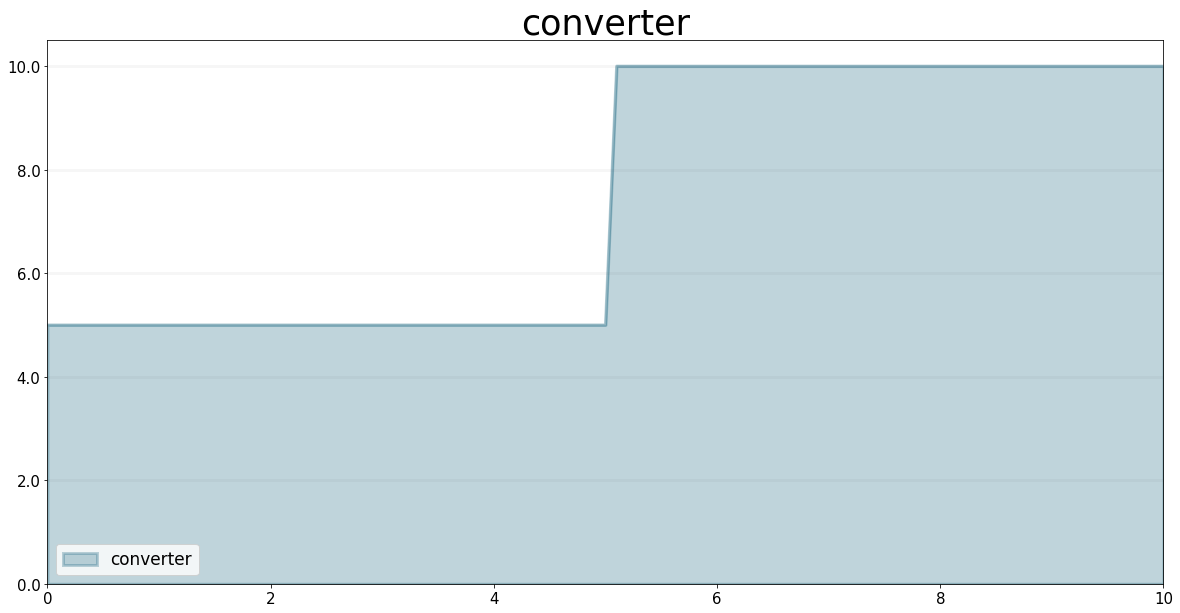

In [3]:
model = Model(starttime=0.0,stoptime=10.0,dt=0.1,name='if')
converter = model.converter("converter")
converter.equation = sd.If( sd.time()>5, 10, 5 )
converter.plot()

You see that its value is 5 until ``t`` reaches 6.

You can also add ``and`` / ``or`` / ``not`` conditions easily:

Signature:
``And(<condition1>, <condition2>)`` : Logical and between 2 conditions
``Or(<condition1>, <condition2>)`` : Logical or between 2 conditions
``Not(<condition>)`` : Logical not: True if condition is False

Each condition within the operators has to return a boolean value. Nesting of the operators is easily possible!

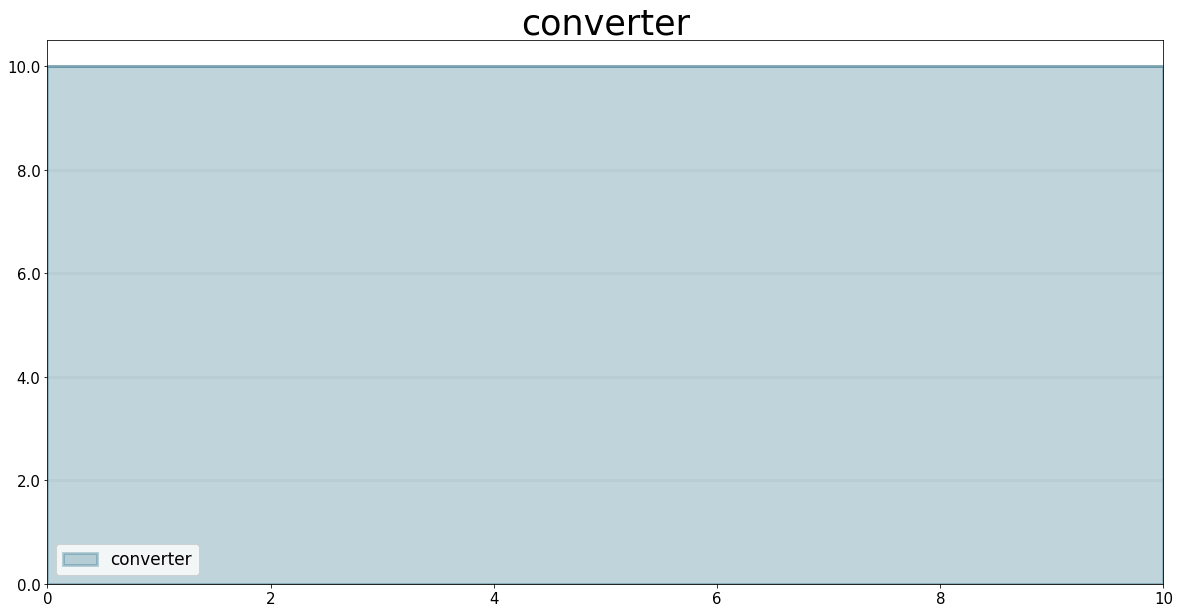

In [4]:
converter.equation = sd.If( sd.And(sd.time()>5,sd.time()>10), 10, 5 ) # 5 (else case) as long as t <= 10, then 10
converter.equation = sd.If( sd.Or( sd.And(sd.time()>5,sd.time()>10), True), 10, 5 ) # Always 10 (then condition, because Or always evaluates to True)
converter.plot()

## ABS Function

The `ABS`function returns the absolute value of its input.

Signature: `abs(input)`

`input` may be any model element.

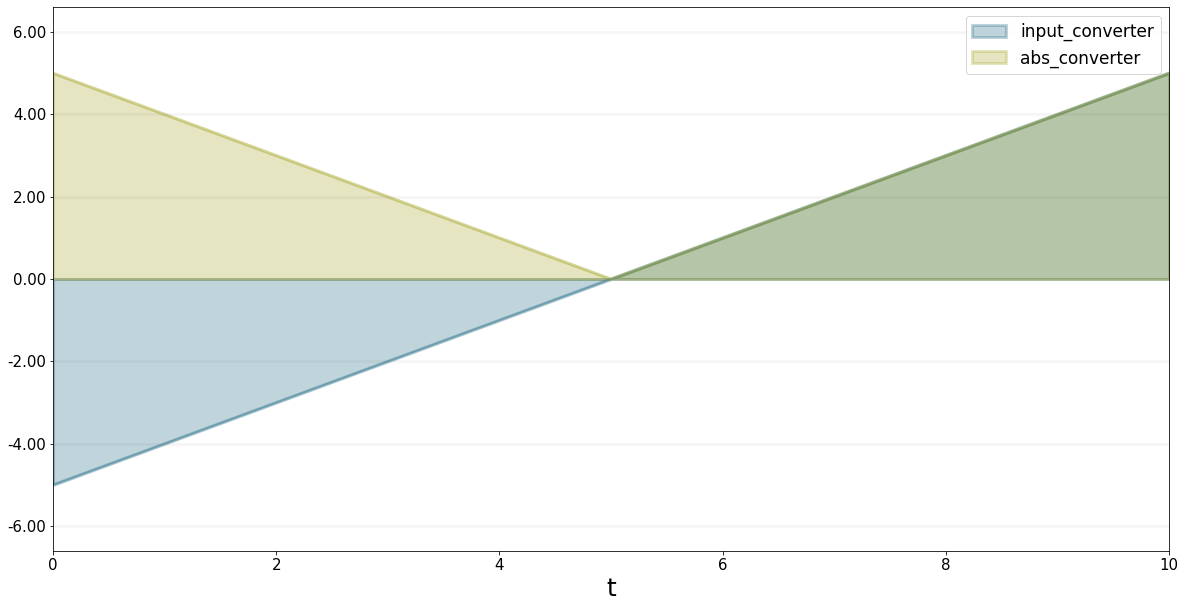

In [2]:
model = Model(starttime=0.0,stoptime=10.0,dt=0.1,name='abs')

input_converter = model.converter("input_converter")

input_converter.equation=sd.time()-5

abs_converter = model.converter("abs_converter")

abs_converter.equation = sd.abs(input_converter)

bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smAbs"],scenarios=["base"],equations=["input_converter","abs_converter"])

## DELAY Function

The DELAY function returns a delayed value of input, using a fixed lag time of delay duration, and an optional initial value initial for the delay. If you don't specify an initial value initial, DELAY assumes the value to be the initial value of input. If you specify delay duration as a variable, the DELAY function uses the initial value for its fixed lag time

Signature: `delay(model, input_function, delay_duration, initial_value)`

`input_function` must be a model element
`delay_duration` and `initial_value` must be floats or model elements.


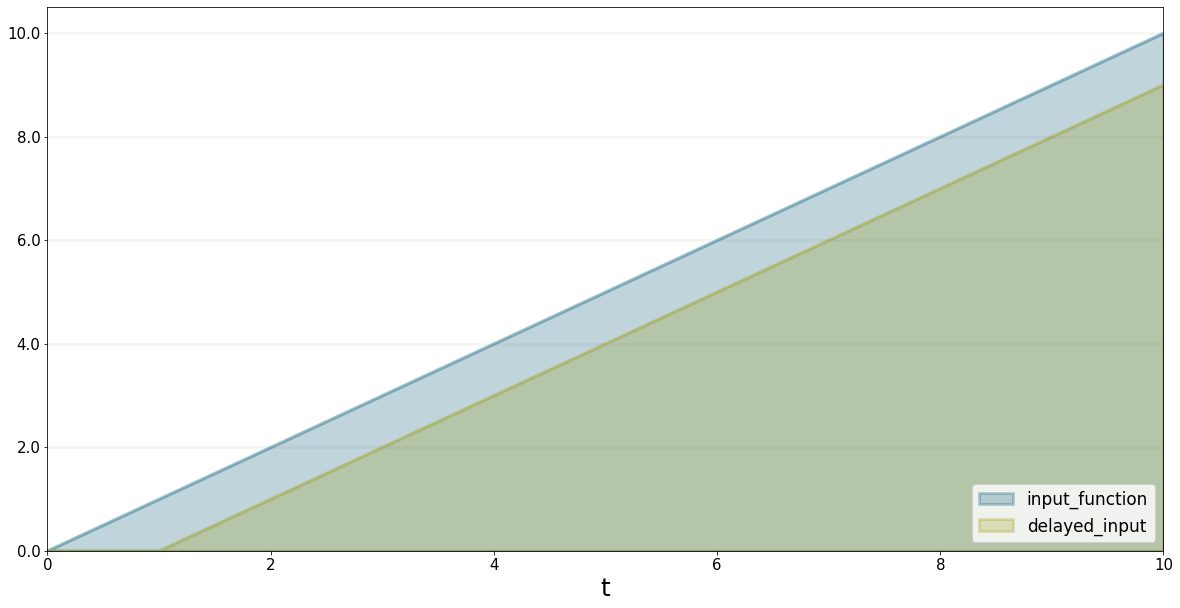

In [3]:
model = Model(starttime=0.0,stoptime=10.0,dt=0.1,name='delay')

input_function = model.converter("input_function")

input_function.equation=sd.time()

delayed_input = model.converter("delayed_input")

delayed_input.equation = sd.delay(model,input_function, 1.0)

bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smDelay"],scenarios=["base"],equations=["input_function","delayed_input"])

## DT Function

The `DT` function returns the models dt..

Signature: `dt(model)`

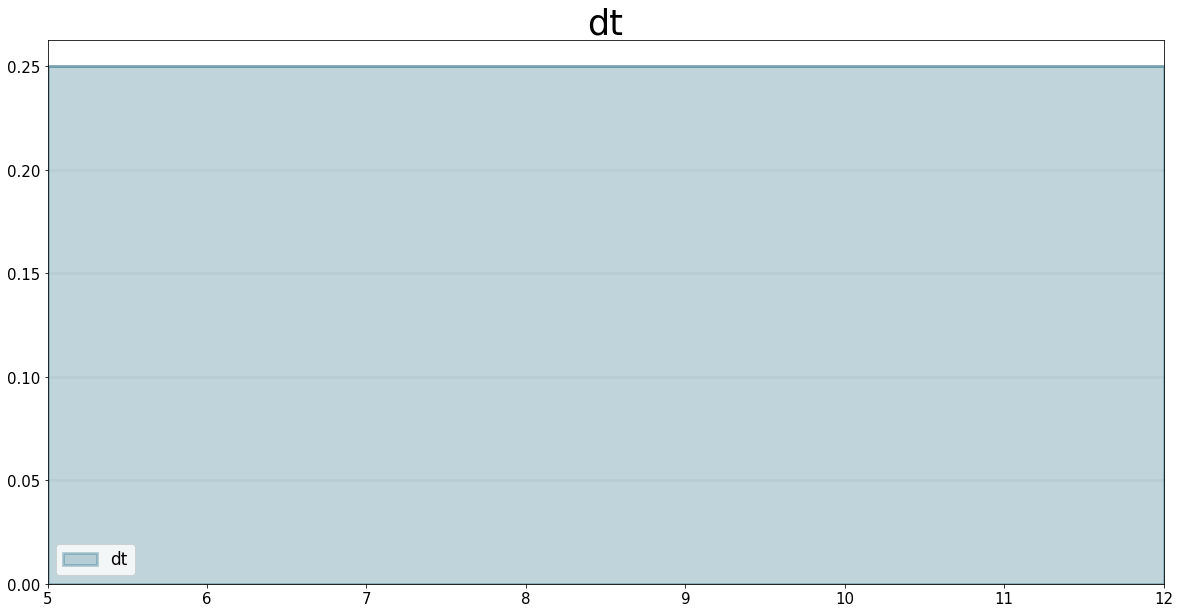

In [4]:
model = Model(starttime=5,stoptime=12,dt=0.25,name='dt')
dt = model.converter("dt")
dt.equation = sd.dt(model)
dt.plot()

## EXP Function

The `exp` function returns the exponential value of the input.

Signature: `exp(element)`

`element` can be any model element (stock, flow, converter, constant)

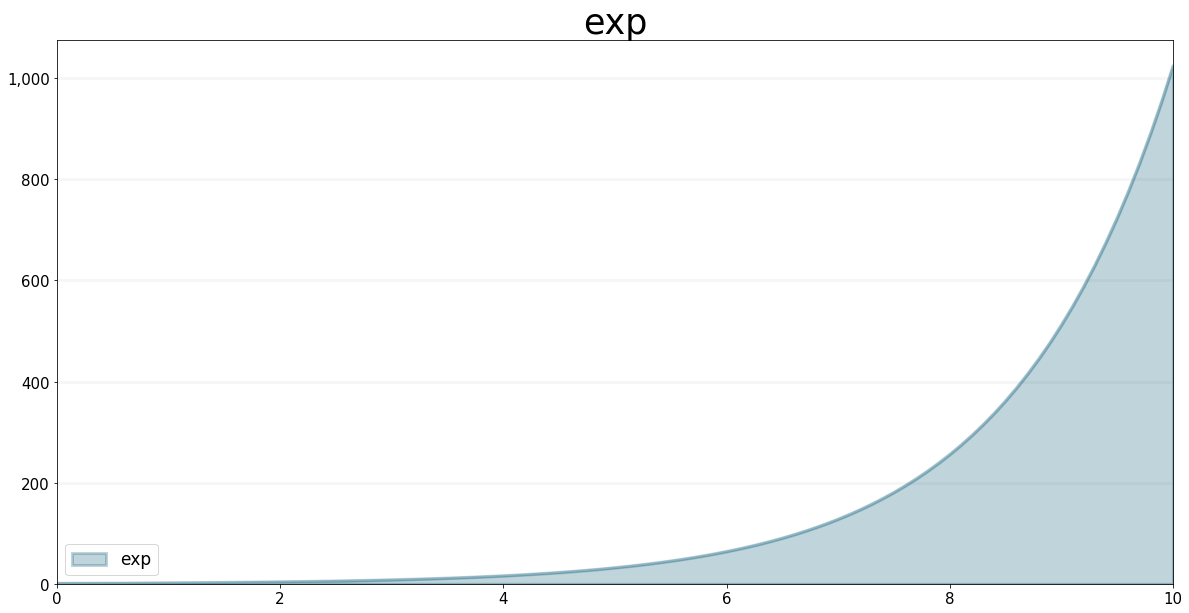

In [5]:
model = Model(starttime=0,stoptime=10,dt=0.1,name='exp')

growth_rate = model.constant("growth_rate")

growth_rate.equation=np.log(2)

exp = model.converter("exp")

exp.equation = sd.exp(growth_rate*sd.time())

exp.plot()

## MAX Function

The `max` function always chooses the larger of its two input values.

Signature: `max(element, element)`

`element` can be any model element (stock, flow, converter, constant)

In [6]:
model = Model(starttime=0.0,stoptime=10.0,dt=1.0,name='max')

In [7]:
a = model.converter("a")

In [8]:
a.equation = 5.0+sd.step(5.0, 5.0)

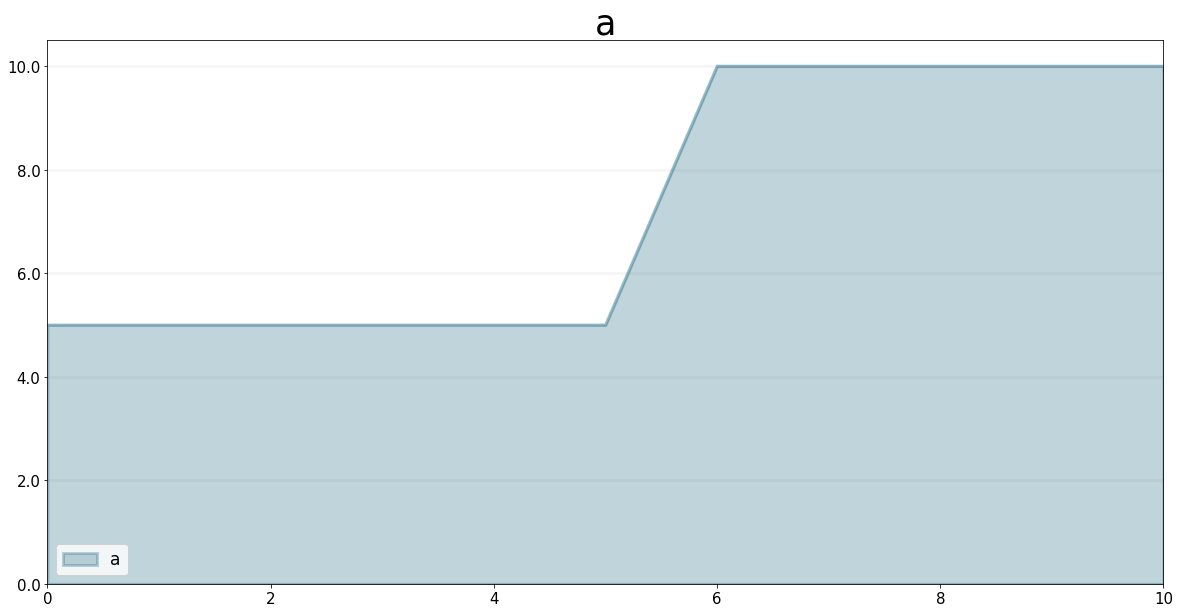

In [9]:
a.plot()

In [11]:
b = model.converter("b")

In [12]:
b.equation= 10.0 - sd.step(5.0, 5.0)

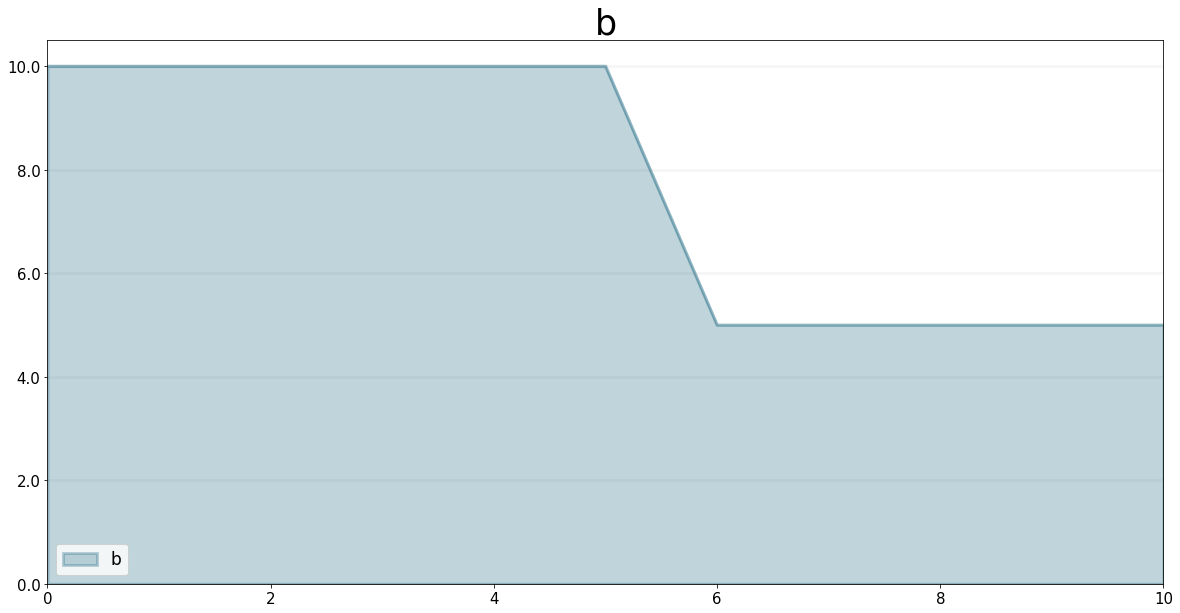

In [13]:
b.plot()

In [14]:
c = model.converter("c")

In [15]:
c.equation=sd.max(a,b)

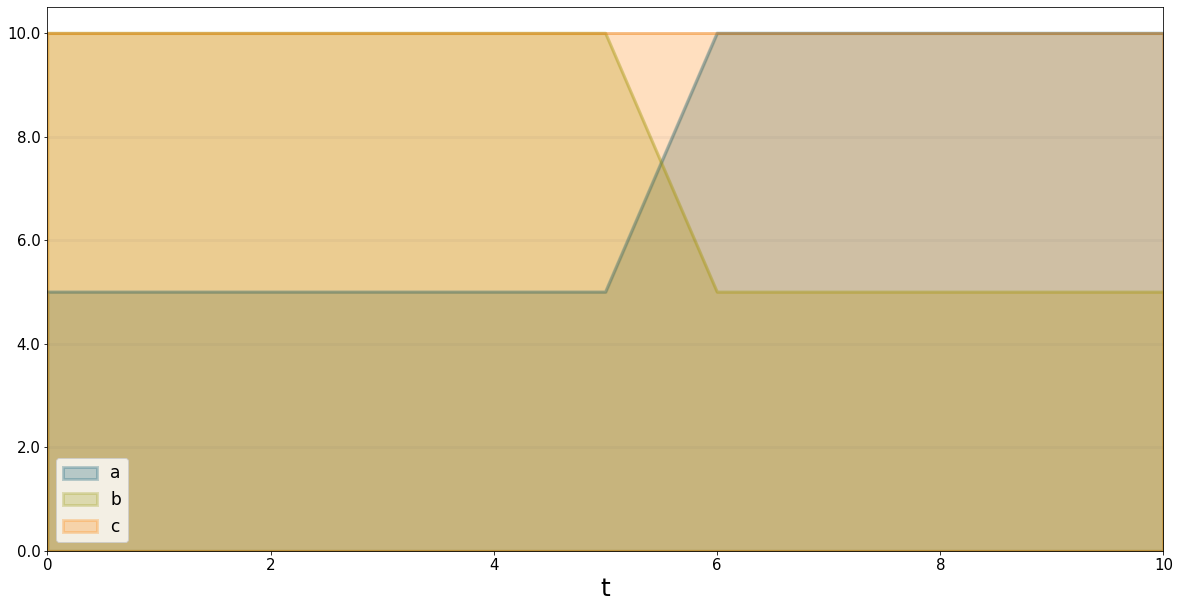

In [16]:
bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smMax"],scenarios=["base"],equations=["a","b","c"])

## MIN Function

The `min` function always chooses the smaller of its two input values.

Signature: `min(element, element)`

`element` can be any model element (stock, flow, converter, constant)

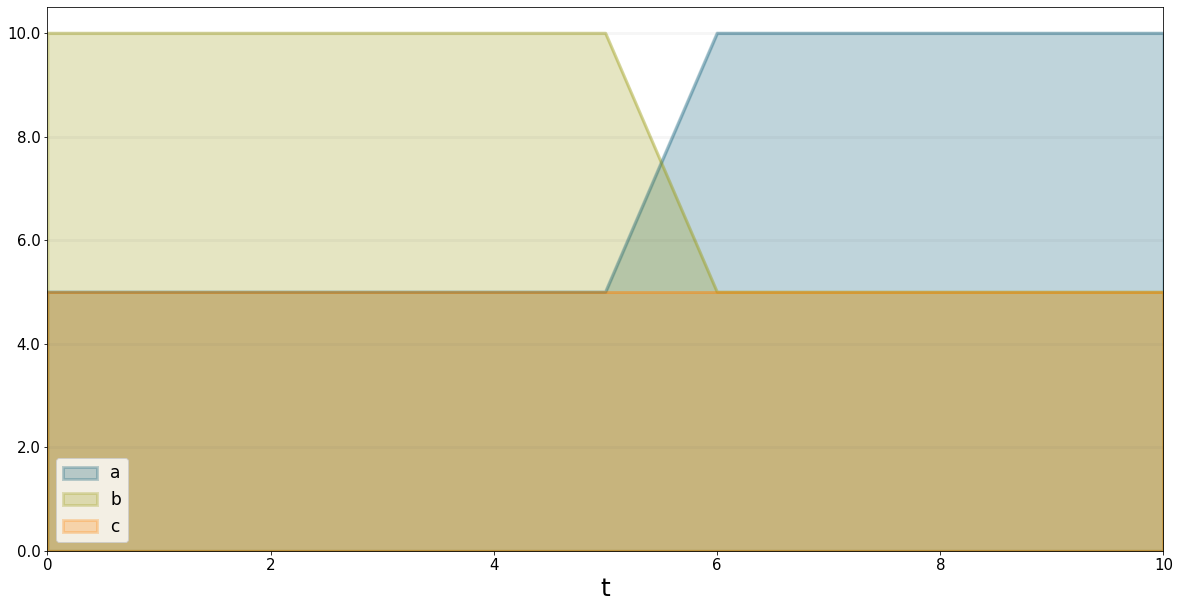

In [17]:
model = Model(starttime=0,stoptime=10,dt=1,name='min')

a = model.converter("a")

a.equation = 5.0+sd.step(5.0, 5.0)

b = model.converter("b")

b.equation= 10.0 - sd.step(5.0, 5.0)

c = model.converter("c")

c.equation = sd.min(a,b)

bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smMin"],scenarios=["base"],equations=["a","b","c"])

## PULSE Function

The `PULSE` function generates a pulse input of a specified size (volume). When using the PULSE builtin, you have the option of setting the time at which the PULSE will first fire (first pulse), as well as the interval between subsequent PULSEs. Each time that it fires a pulse, the framework pulses the specified volume over a period of one time step (DT). Thus, the instantaneous value taken on by the PULSE function is volume/DT. 

Signature: `pulse(model, volume, first_pulse=0, interval=0)`

Setting `interval` to 0 yields a single pulse that doesn't repeat

`volume` can be either a variable or a constant, `first_pulse` and `interval` must be constants.



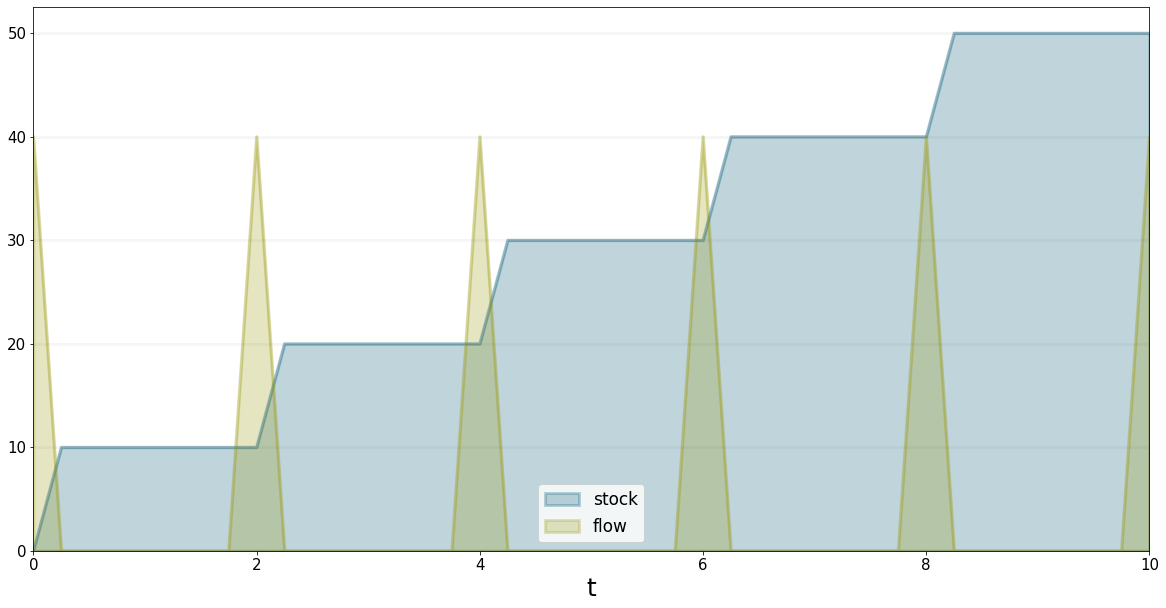

In [18]:
model = Model(starttime=0.0,stoptime=10.0,dt=0.25,name='pulse')

stock = model.stock("stock")
stock.initial_value=0.0

flow = model.flow("flow")
flow.equation=sd.pulse(model,10.0,2.0,2.0)

stock.equation = flow

bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smPulse"],scenarios=["base"],equations=["stock","flow"])

## SMOOTH Function

The SMOOTH function calculates the exponential average of the input, given the input function, an initial value and an averaging time. 

Signature: `smooth(model, input_function, averaging_time, initial_value)`

`model`: The model you are writing equations for

`input_function`: any model element

`averaging_time`: any model element

`initial_value`: a floating point value or constant

The SMOOTH operator is a shorthand for the following stock and flow structure and equations:

![Stock and Flow Structure for the TREND Operator](smooth_model.png)



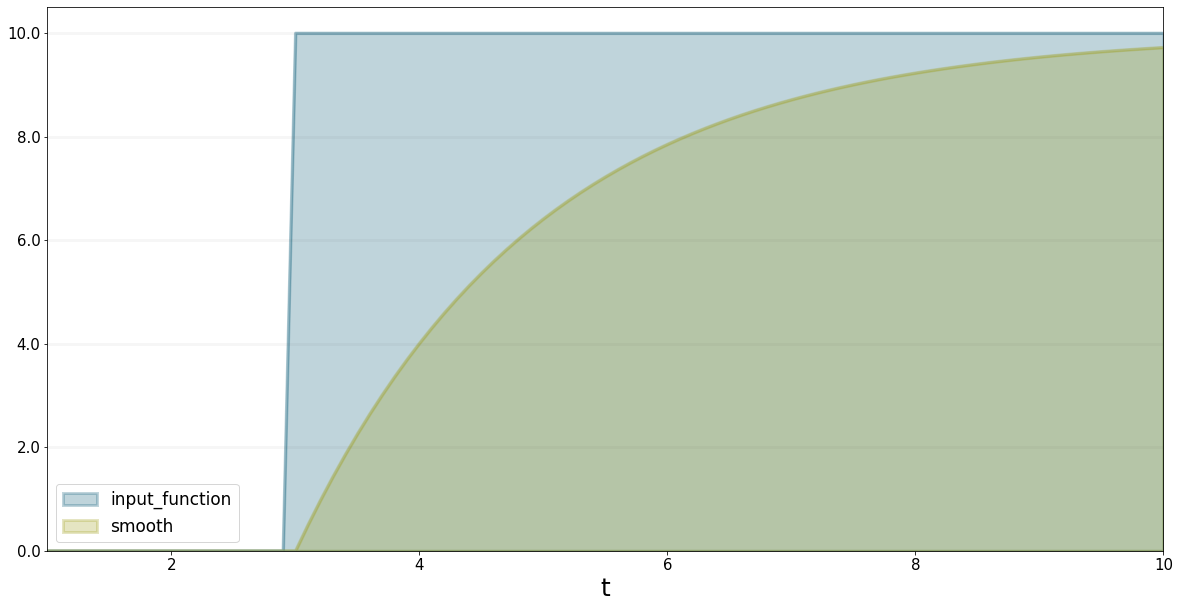

In [19]:
model = Model(starttime=1.0,stoptime=10.0,dt=0.1,name='smooth')
input_function = model.converter("input_function")
input_function.equation=sd.step(10.0,3.0)
smooth = model.converter("smooth")
smooth.equation=sd.smooth(model, input_function,2.0,0.0)
bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smSmooth"],scenarios=["base"],equations=["input_function","smooth"])

## STARTTIME Function

The `STARTTIME` function returns the models starttime.

Signature: `starttime(model)`

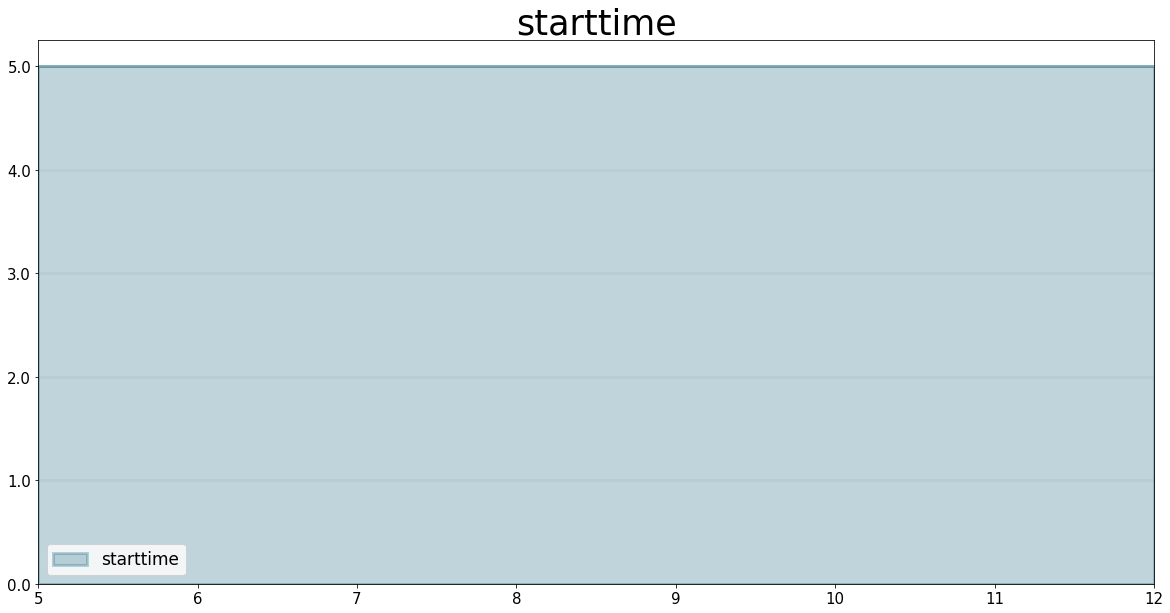

In [21]:
model = Model(starttime=5,stoptime=12,dt=1,name='starttime')
starttime = model.converter("starttime")
starttime.equation = sd.starttime(model)
starttime.plot()

## STOPTIME Function

The `STOPTIME` function returns the models starttime.

Signature: `stoptime(model)`

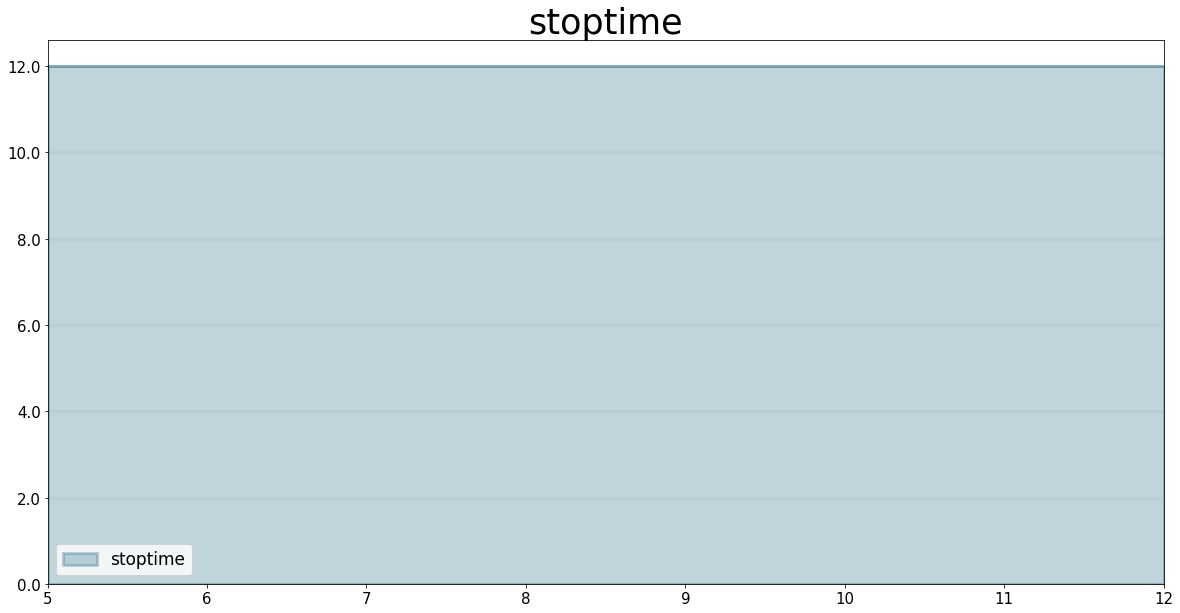

In [22]:
model = Model(starttime=5,stoptime=12,dt=1,name='stoptime')
stoptime = model.converter("stoptime")
stoptime.equation = sd.stoptime(model)
stoptime.plot()

## STEP Function

The STEP function generates a change of specified height, which occurs at a specified time. 

Signature: `step(height, timestep)`

`input_function`: any model element or a floating point number

`averaging_time`: any model element or a floating point numnber

`initial_value`: a floating point value or a constant


In [23]:
model = Model(starttime=1,stoptime=10,dt=1,name='step')

step = model.converter("step")
step.equation=sd.step(10.0,5.0)

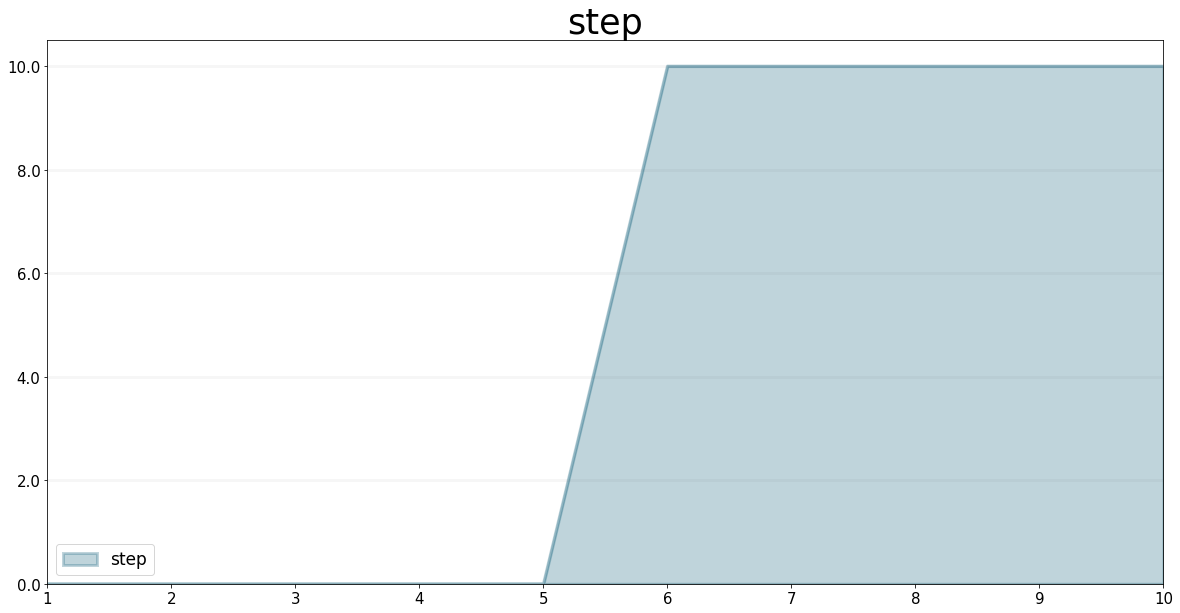

In [24]:
step.plot()

## TIME Function

The `time` function returns the current simulation time.

Signature: `time()`

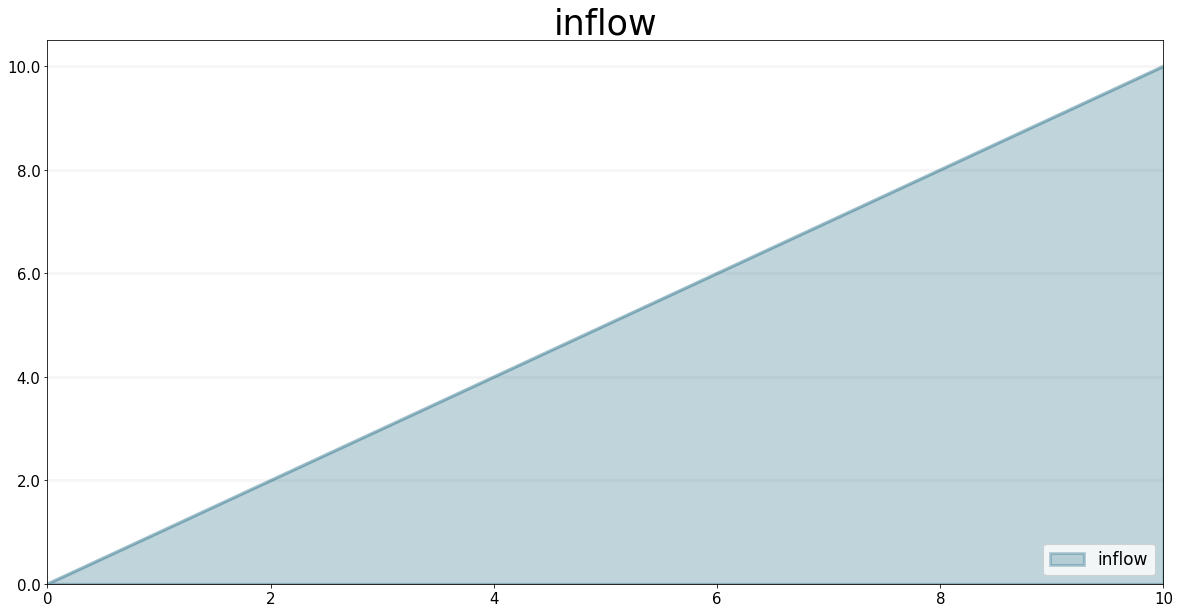

In [25]:
model = Model(starttime=0,stoptime=10,dt=1,name='time')

stock = model.stock("stock")

stock.initial_value=0.0

inflow = model.flow("inflow")

inflow.equation = sd.time()

stock.equation = inflow

inflow.plot()

## TREND Function

The TREND function calculates the trend in the input, given the input, an initial value and an averaging time. The TREND is defined to be the fractional change in input compared to the exponential average of input per averaging time. The TREND function thus estimates the growth rate of is input function.


Signature: `trend(model, input_function, averaging_time, initial_value)`

`model`: The model you are writing equations for

`input_function`: any model element

`averaging_time`: any model element

`initial_value`: a floating point value or constant

The TREND operator is a shorthand for the following stock and flow structure and equations:

![Stock and Flow Structure for the TREND Operator](trend_model.png)



In [26]:
model = Model(starttime=1,stoptime=10,dt=0.01,name='trend')

growth_rate = model.constant("growth_rate")

growth_rate.equation=np.log(2)

input_function = model.converter("input_function")

input_function.equation = sd.exp(growth_rate*sd.time())


trend = model.converter("trend")

trend.equation = sd.trend(model,input_function,1.0,2/(1+np.log(2))) 

As an example, we set up a small model that has an input function that doubles every timestep - i.e the exponential growth rate is log 2 ≈ 0.69 and then apply the trend function to estimate the growth rate.

Here is a plot of the growth rate, which is constant:

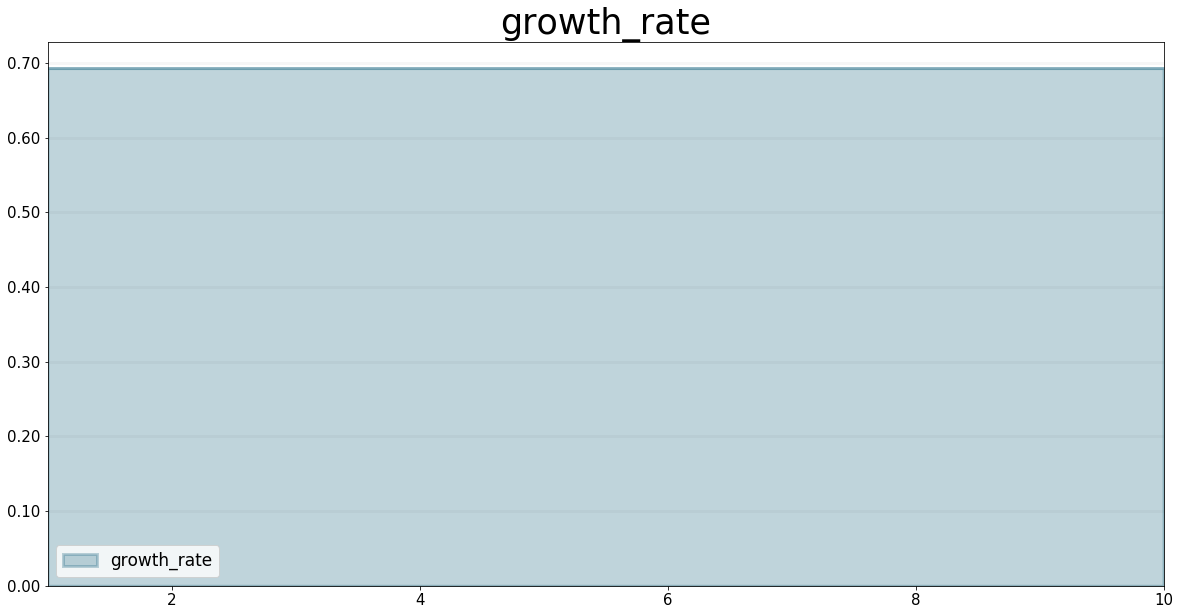

In [27]:
growth_rate.plot()

This gives an input function which doubles in value on every timestep:

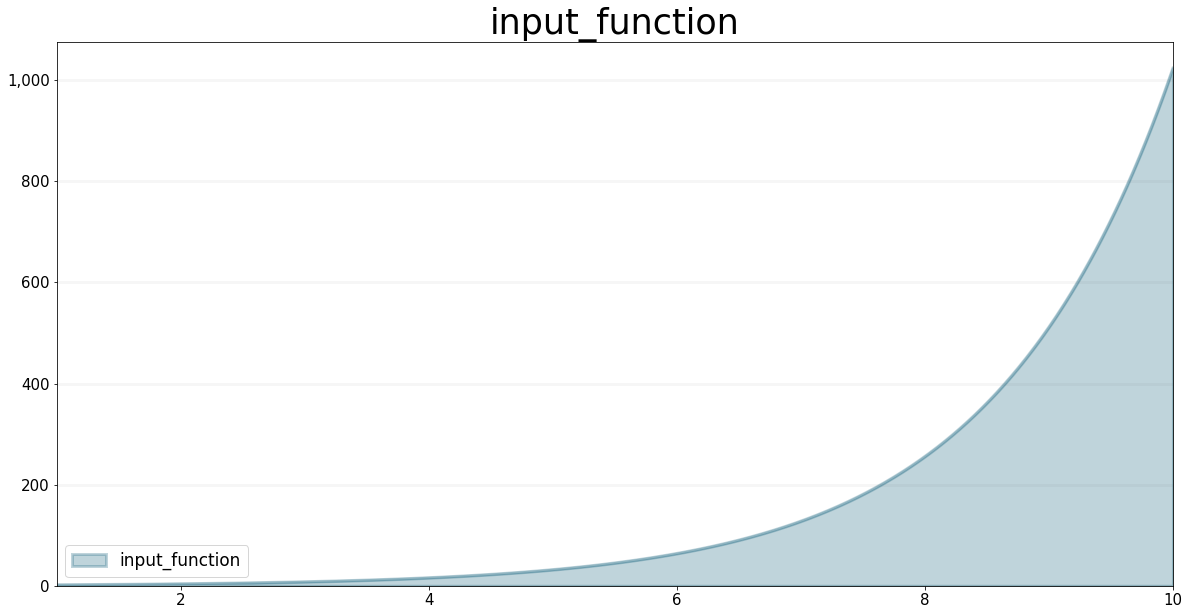

In [28]:
input_function.plot()

As expexted, the plot of the trend function converges to the input growth rate:

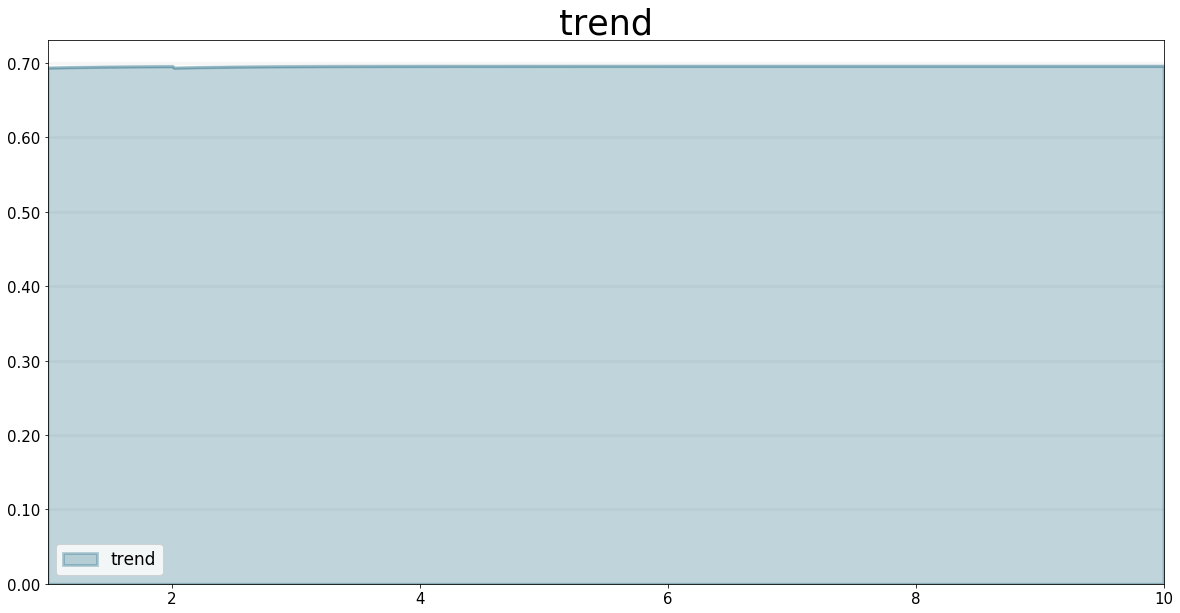

In [29]:
trend.plot()

## ROUND Function

This function rounds any input to a specified number of digits.

Signature:
``round(expression, digits)``

``expression`` can be any float input by any expression.
``digits`` must be an int value

A minimal example that rounds random numbers between 0 and 2 to 0 digits (int number):

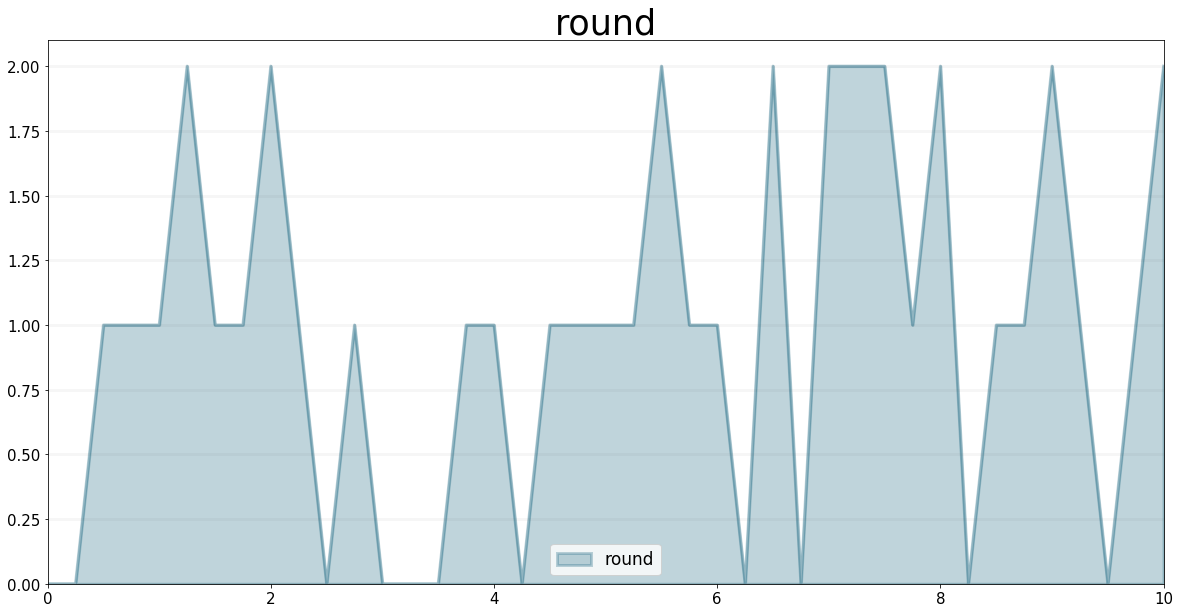

In [52]:
model = Model(starttime=0.0,stoptime=10.0,dt=0.25,name='round')
flow = model.flow("round")
flow.equation = sd.round( sd.random(0, 2), 0 )
flow.plot()

## SQRT
Computes the Square root of an input expression.

Signature:
``sqrt(expression)``

``expression`` can be any element that returns a float value.

Simple Example:

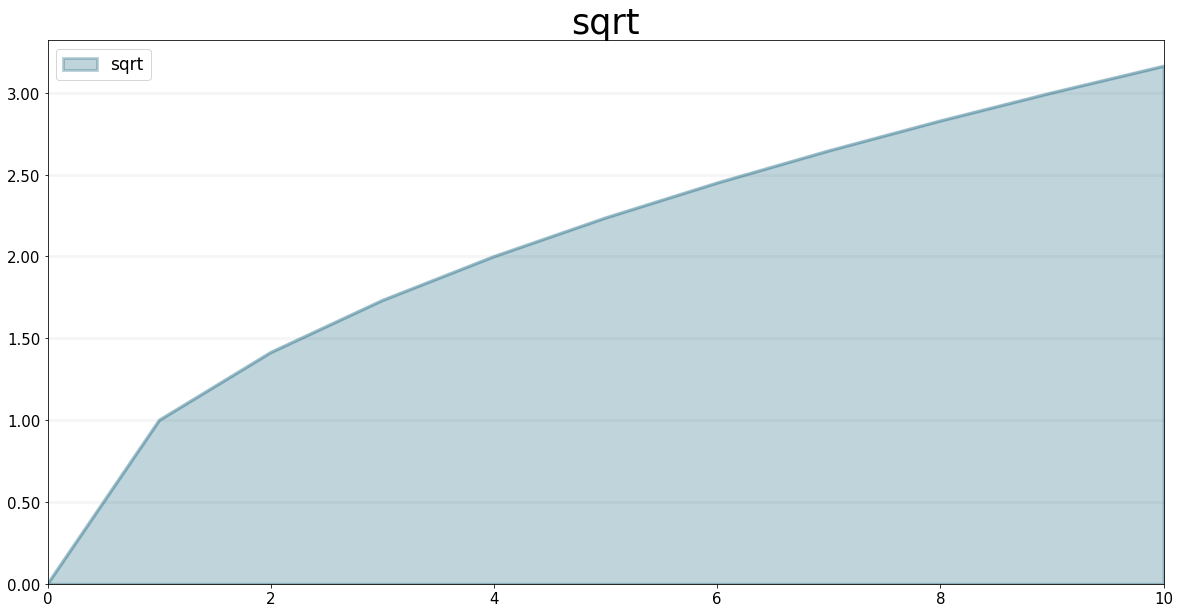

In [5]:
m= Model(starttime=0,stoptime=10,dt=1)
f = m.flow(name="sqrt")

val = sd.time() 

f.equation = sd.sqrt(val)
f.plot()

## NAN / INF / PI

``sd.nan()`` returns a NAN value, ``sd.Inf()`` gives you the infinity value, ```sd.pi()``` returns the number pi.



## SIN / TAN / COS and ARCCOS / ARCSIN / ARCTAN

The SD DSl supports all trigonometric that you are also used to from other SD simulation / modelling tools

Use ``sd.sin(x) / sd.cos(x) / sd.tan(x)`` for sinus, cosinus or tangent of x (radians) and ``sd.arcsin(x) / sd.arctan(x) / sd.arccos(x)`` for the respective arctan / arccos and arcsine operators.

Let's easily plot sin / cos and tan for the current simulation time:

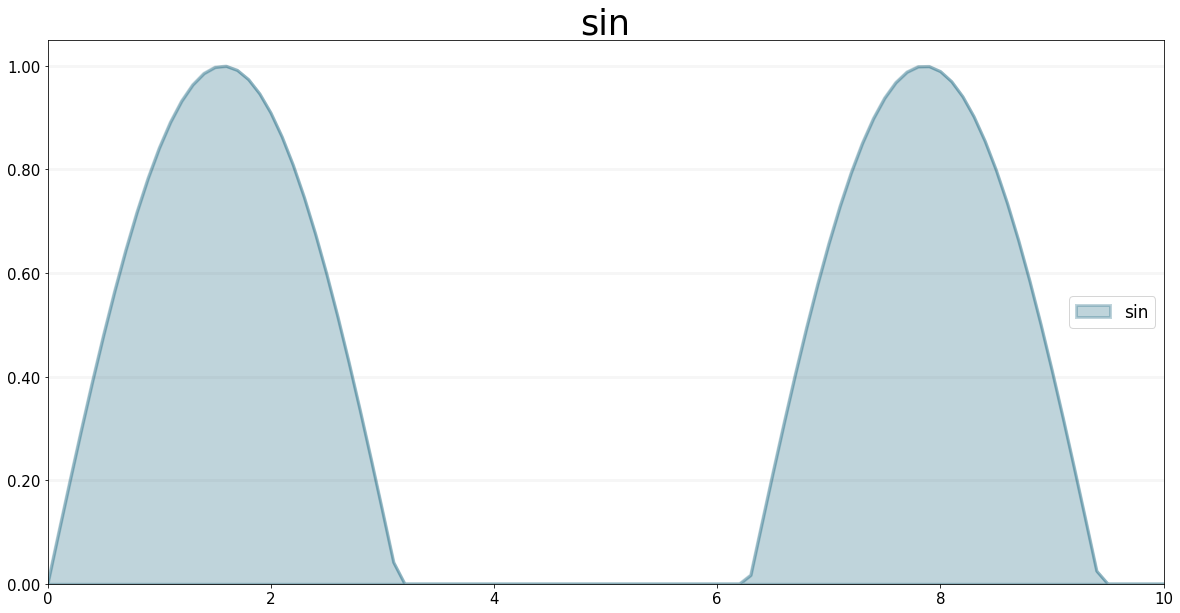

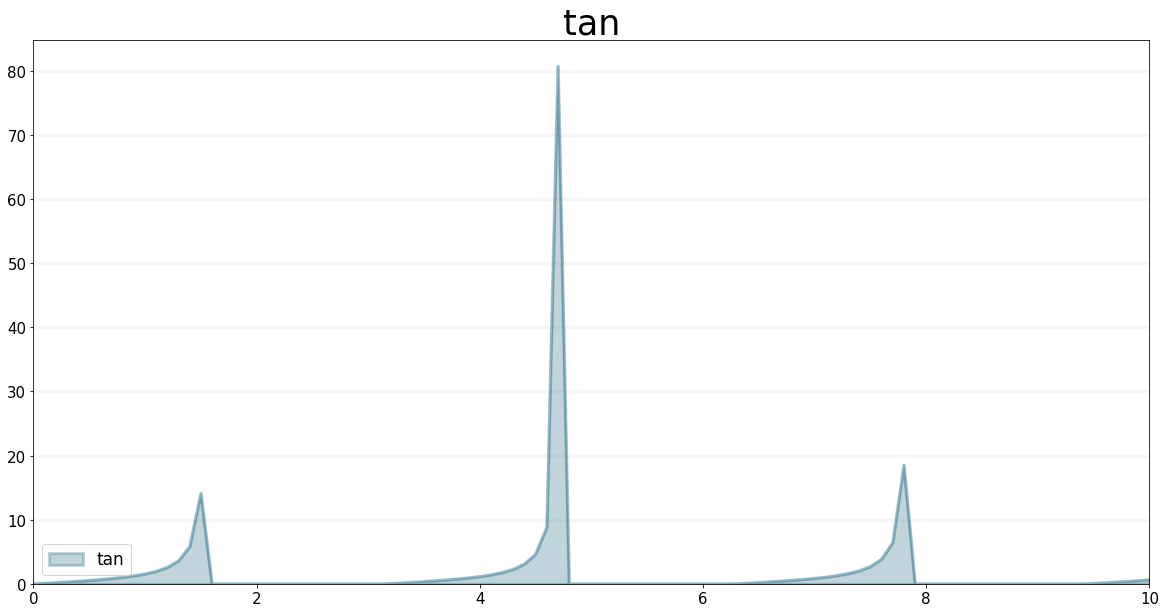

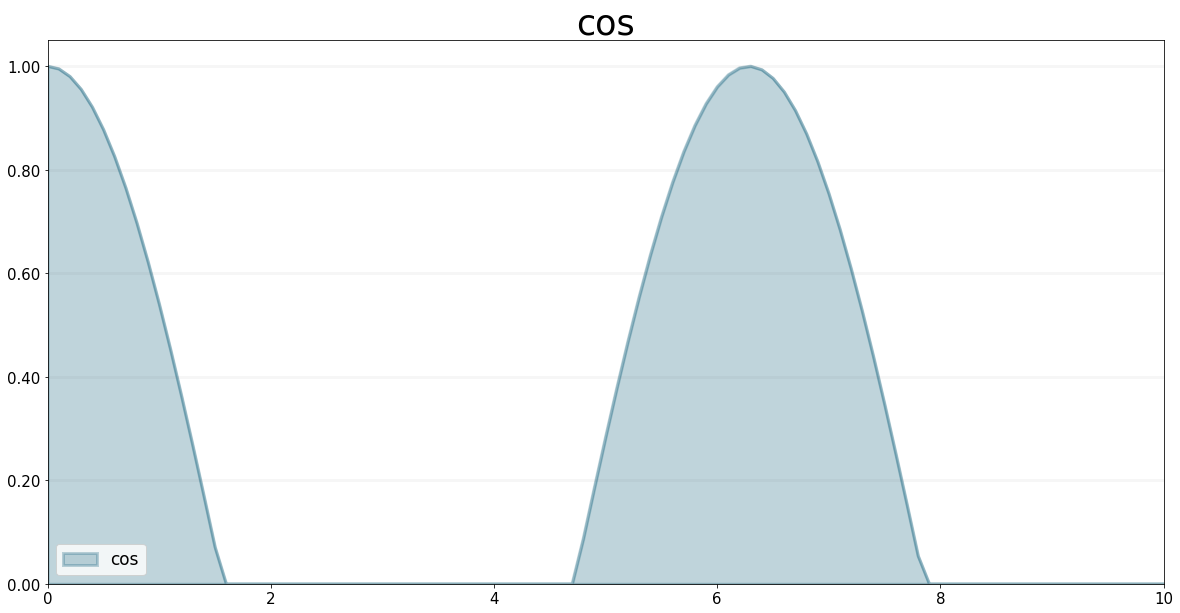

In [11]:
m= Model(starttime=0,stoptime=10,dt=0.1)
sin = m.flow(name="sin")
tan = m.flow(name="tan")
cos = m.flow(name="cos")
x = sd.time() 

sin.equation = sd.sin(x)
tan.equation = sd.tan(x)
cos.equation = sd.cos(x)

sin.plot()
tan.plot()
cos.plot()

## SINWAVE and COSWAVE function

SINWAVE returns a time-dependent sine wave, with the specified amplitude and period. To generate the sine wave, the SINWAVE builtin uses the absolute value of the amplitude you specify. To produce meaningful wave results, choose a DT that's significantly smaller than the period of the wave. A DT equal to a quarter of the period gives triangle waves. A smaller DT gives results which better approximate a continuous curve.

COSWAVE generates a time-dependent __cosine__ wave. It uses the same arguments

Signature:
``sinwave(amplitude,period)``

``amplitude`` : Amplitude of the sine wave
``period`` : Period of the sine wave

Example:

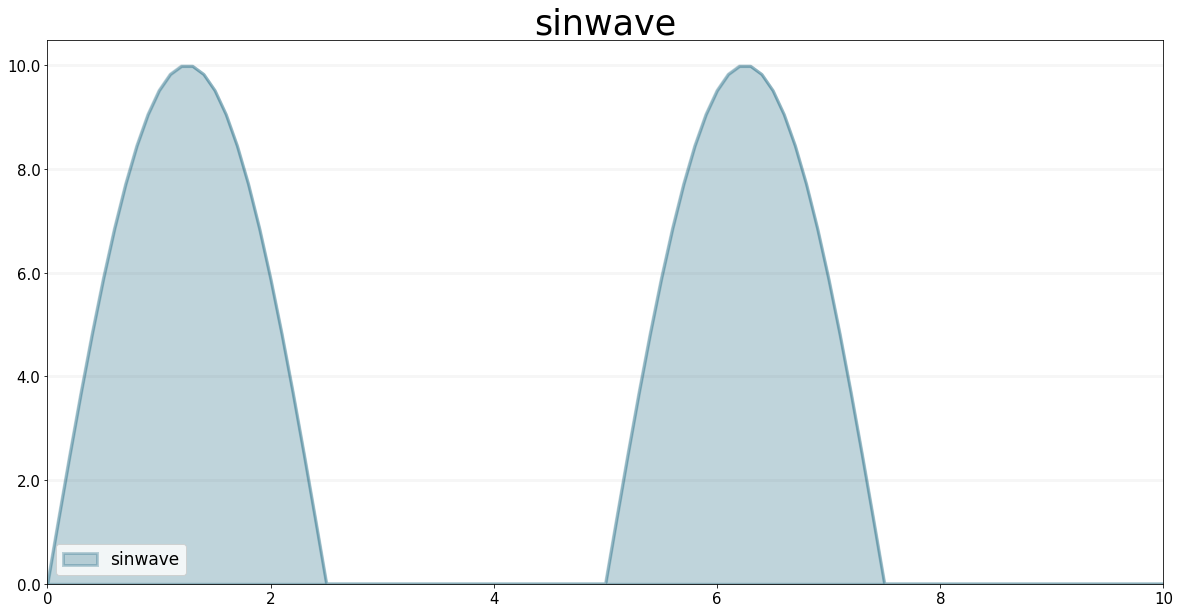

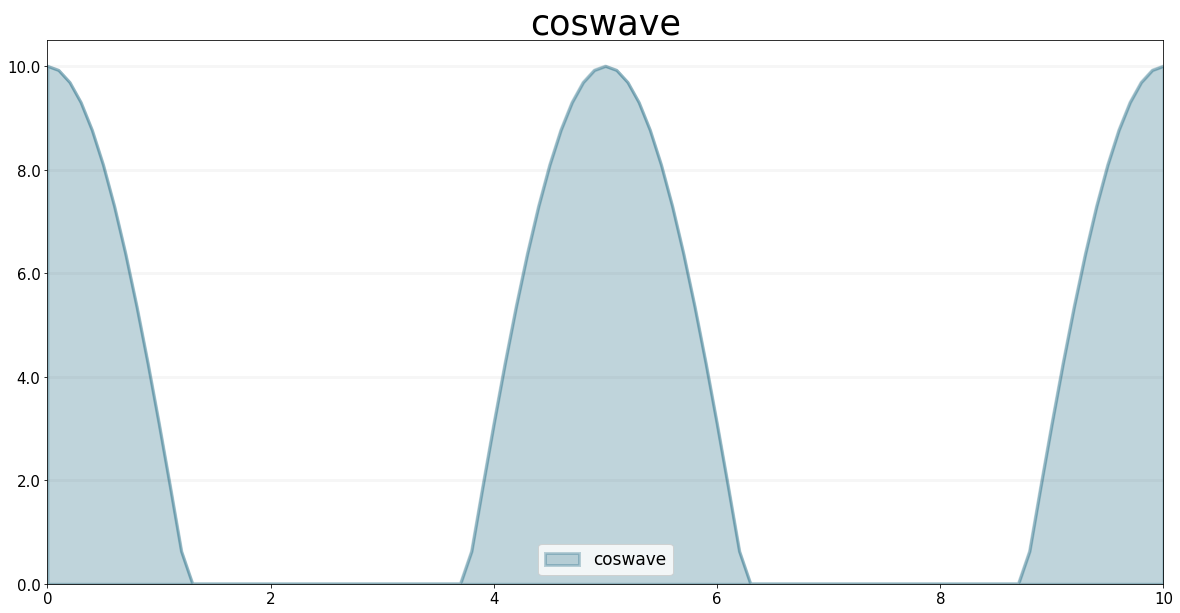

In [15]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="sinwave")
g = m.flow("coswave")
amplitude = 10
period = 5

f.equation = sd.sinwave(amplitude, period)
g.equation = sd.coswave(amplitude, period)
f.plot()
g.plot()

## BETA Function
The BETA operator generates a series of random numbers that conforms to a beta distribution defined by two shape arguments, ``alpha`` and ``beta``.

Example:

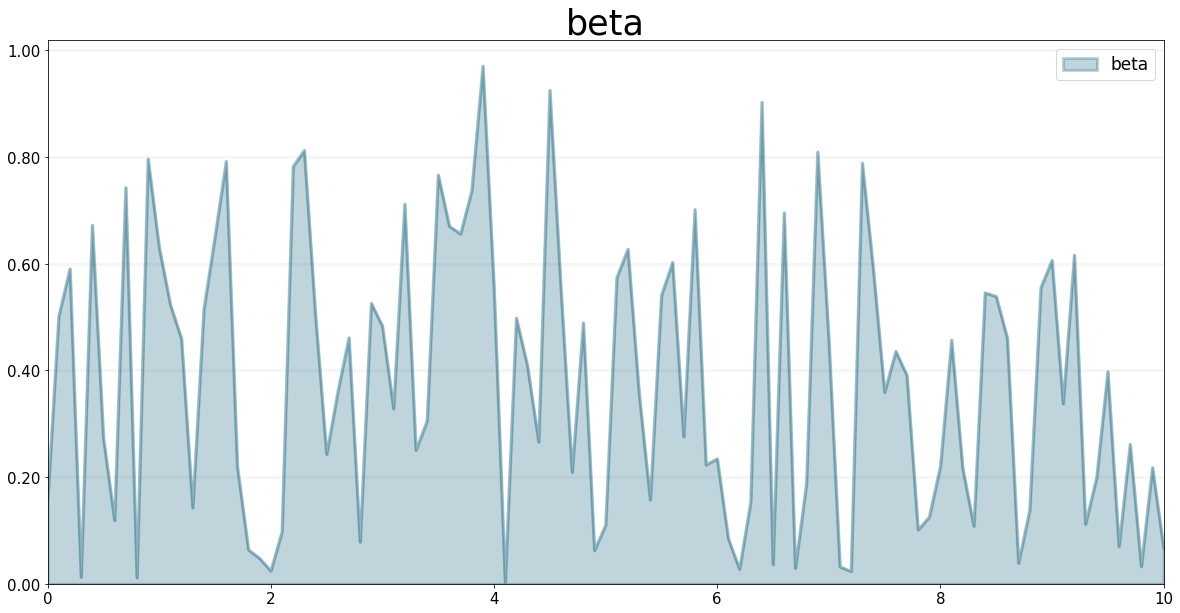

In [3]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="beta")
alpha = 1
beta = 2
f.equation = sd.beta(alpha, beta)
f.plot()

## BINOMIAL
This operator generates a series of random numbers from a discrete probability distribution of the number of successes in a sequence of trials with a given success probability. The success probability should be a number between 0 and 1.

Arguments are ``number of trials (n)`` and ``success probability (p)``.

A quick example:

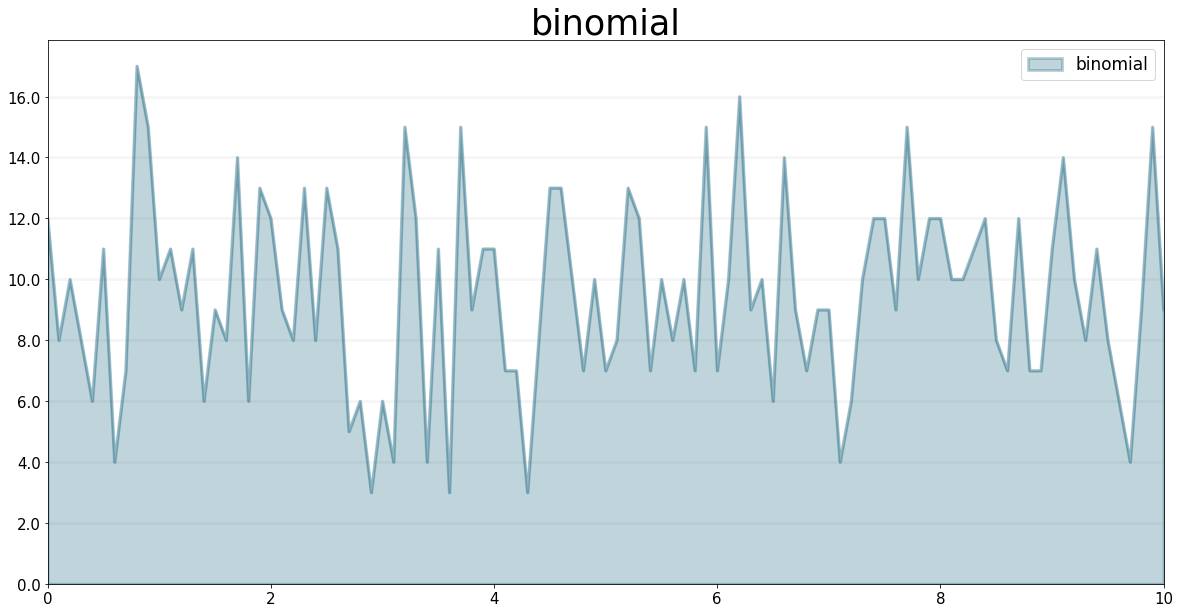

In [5]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="binomial")
n = 100
p = 0.1
f.equation = sd.binomial(n, p)
f.plot()

## COMBINATIONS
The COMBINATIONS operator calculates the number of r-element subsets (or r-combinations) of an n-element set.

Arguments are ``n`` and ``r``.

Example with ``time`` as ``n``:

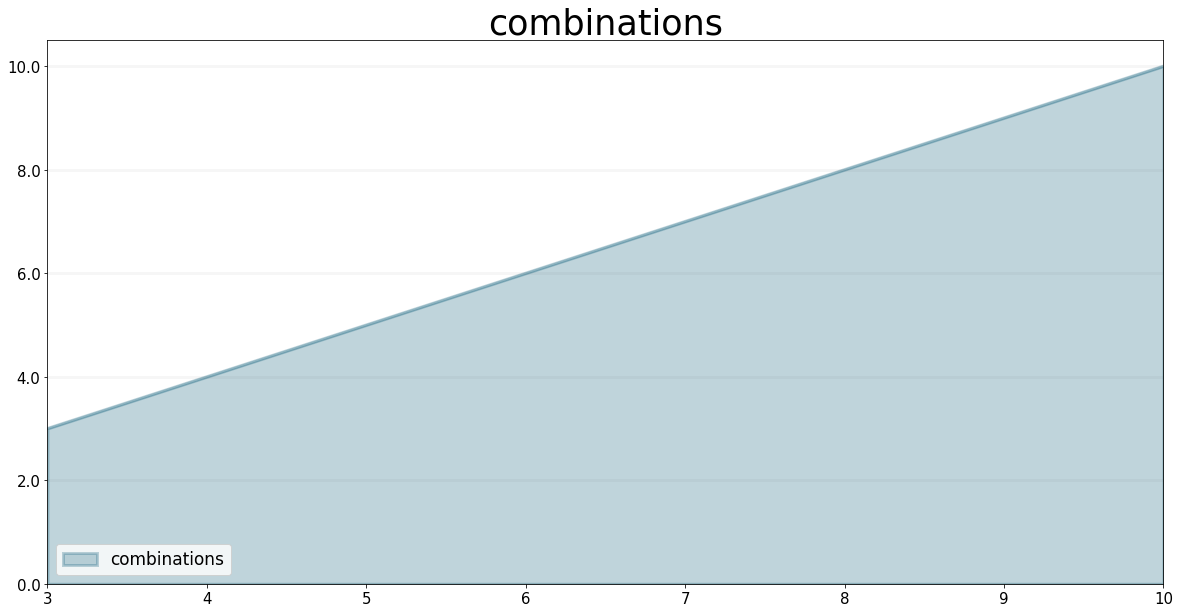

In [6]:
m= Model(starttime=3,stoptime=10,dt=1)
f = m.flow(name="combinations")
n = sd.time()
r = 1
f.equation = sd.combinations(n,r)
f.plot()

## EXPRND Function
This operator generates a series of exponentially distributed random numbers with a given ``mean``.

Example:

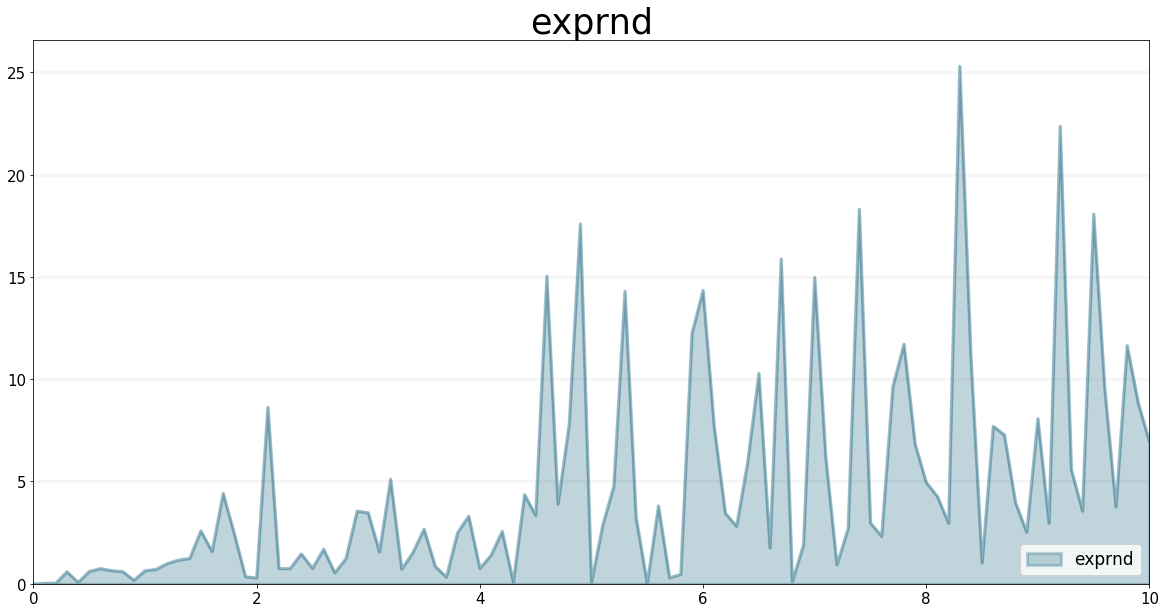

In [7]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="exprnd")

mean = sd.time()
f.equation = sd.exprnd(mean)
f.plot()


## FACTORIAL Function
The FACTORIAL function calculates the factorial of the single argument ``n`` (traditionally noted as n!). ``n`` must be an integer value, decimal values are not allowed.

Example:

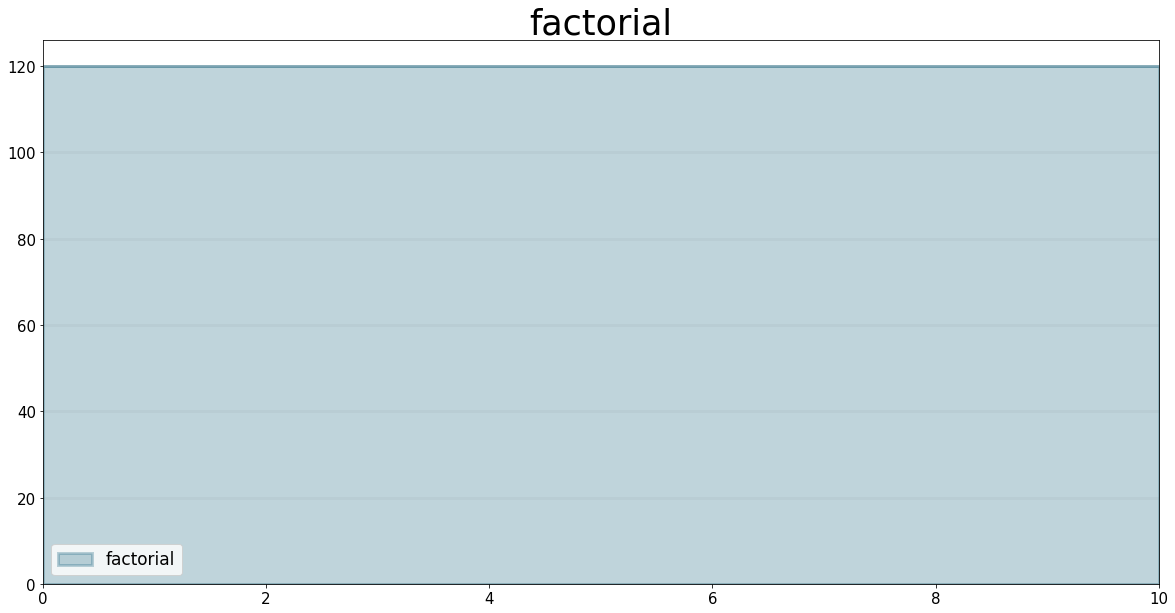

In [8]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="factorial")

n = 5

f.equation = sd.factorial(n)
f.plot()

## GAMMA Function
The GAMMA builtin generates a series of random numbers that conforms to a gamma distribution with the specified ``shape`` and ``scale``. If unspecified, ``scale`` uses the value 1.0

Example:

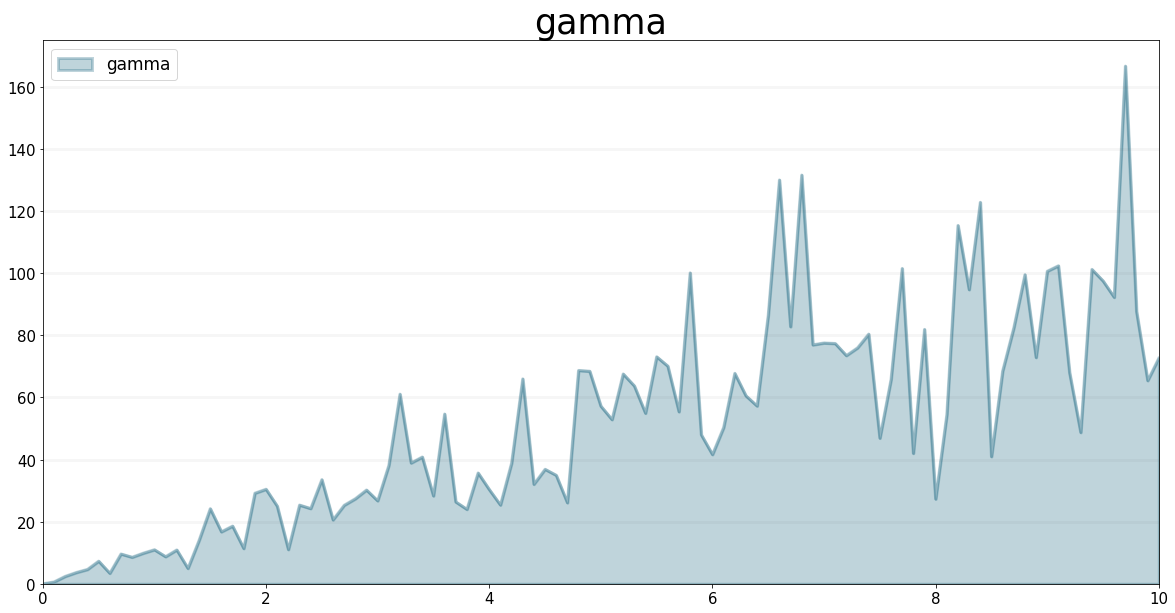

In [10]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="gamma")

shape = 10
scale = sd.time()

f.equation = sd.gamma(shape, scale)
f.plot()


## GAMMALN Function

The GAMMALN operator returns the natural log of the GAMMA function, given input n. The GAMMA function is a continuous version of the FACTORIAL builtin, with GAMMA(n) the same as FACTORIAL(n-1).

Only argument is ``n``

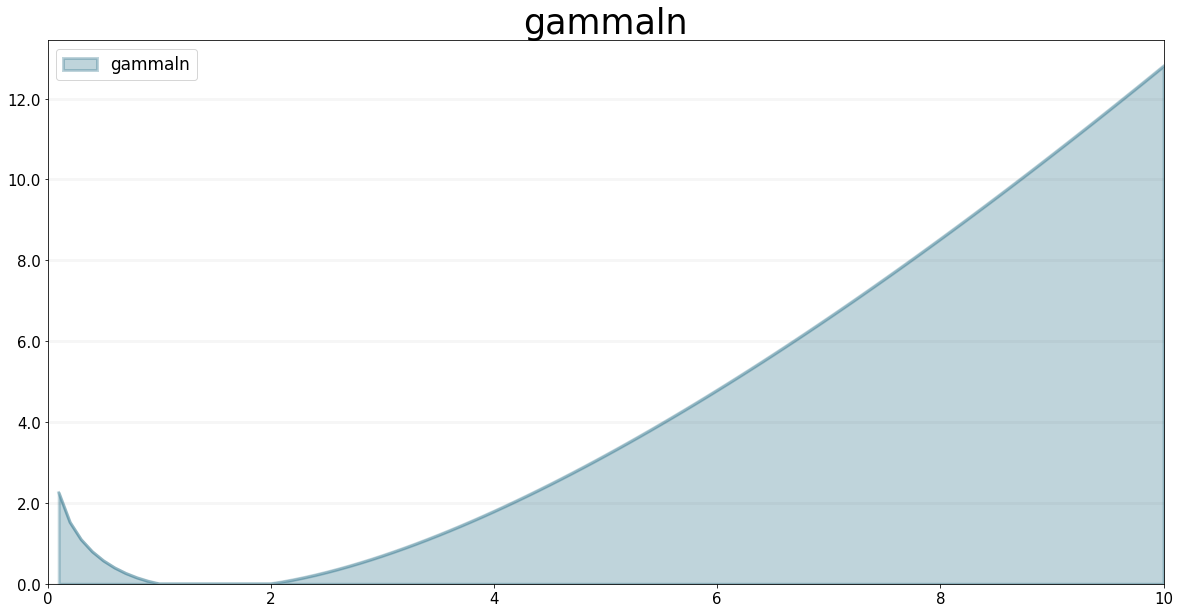

In [13]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="gammaln")

n = sd.time()
f.equation = sd.gammaln(n)
f.plot()

## GEOMETRIC Function

The GEOMETRIC operator generates a series of random numbers from a discrete probability distribution of the number of trials before the first success with a given ``success probability (p)``.

``p`` is the only parameter. It should be any value between 0 and 1.

Example:

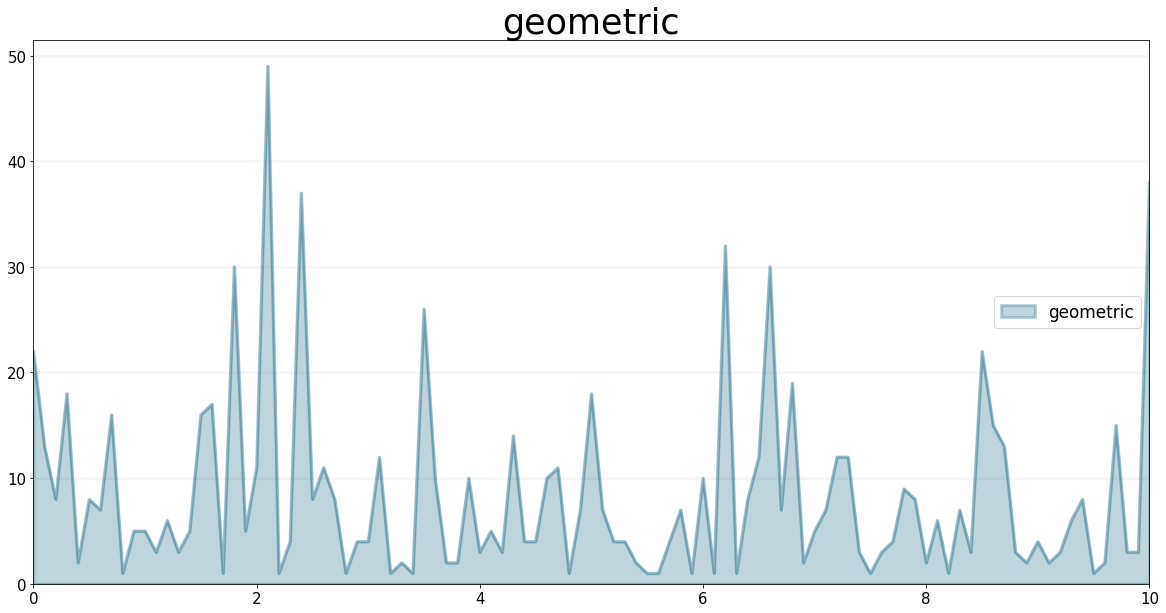

In [18]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="geometric")

p = 0.1

f.equation = sd.geometric(p)
f.plot()

## INVNORM Function

The INVNORM operator calculates the inverse of the NORMALCDF function (see below).

Parameter is the ``probability p`` (any value between 0 and 1).

Example:

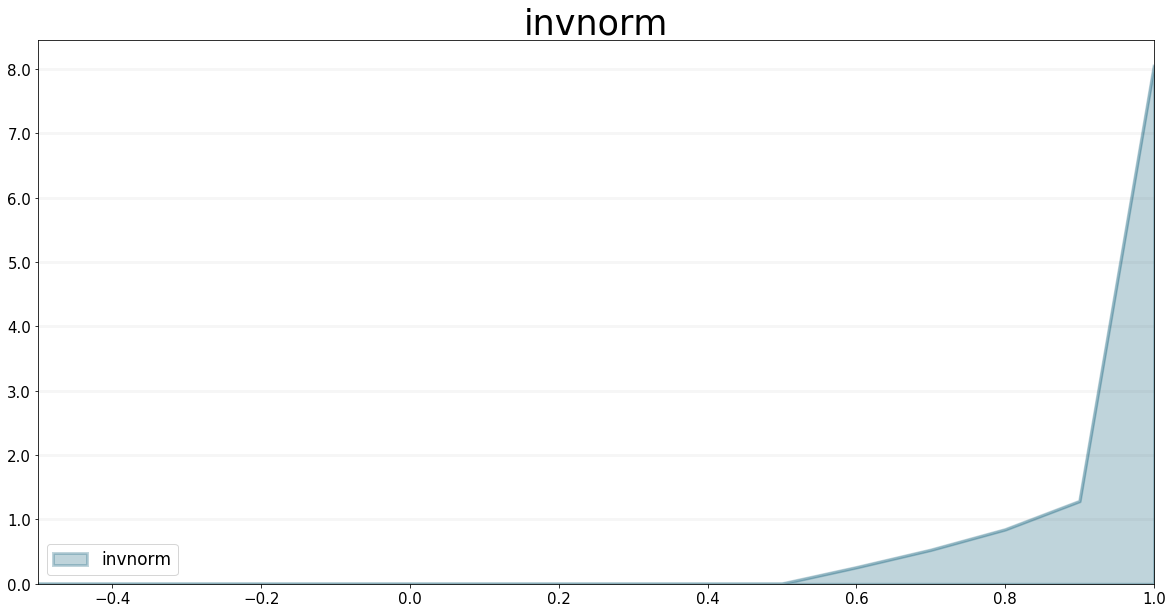

In [28]:
m= Model(starttime=-0.5,stoptime=1,dt=0.1)
f = m.flow(name="invnorm")

p = sd.time()

f.equation = sd.invnorm(p)
f.plot()

## LOGISTIC Function

The LOGISTIC operator generates a series of random numbers that conforms to a logistic distribution with a specified ``mean`` and ``scale``.

Example:

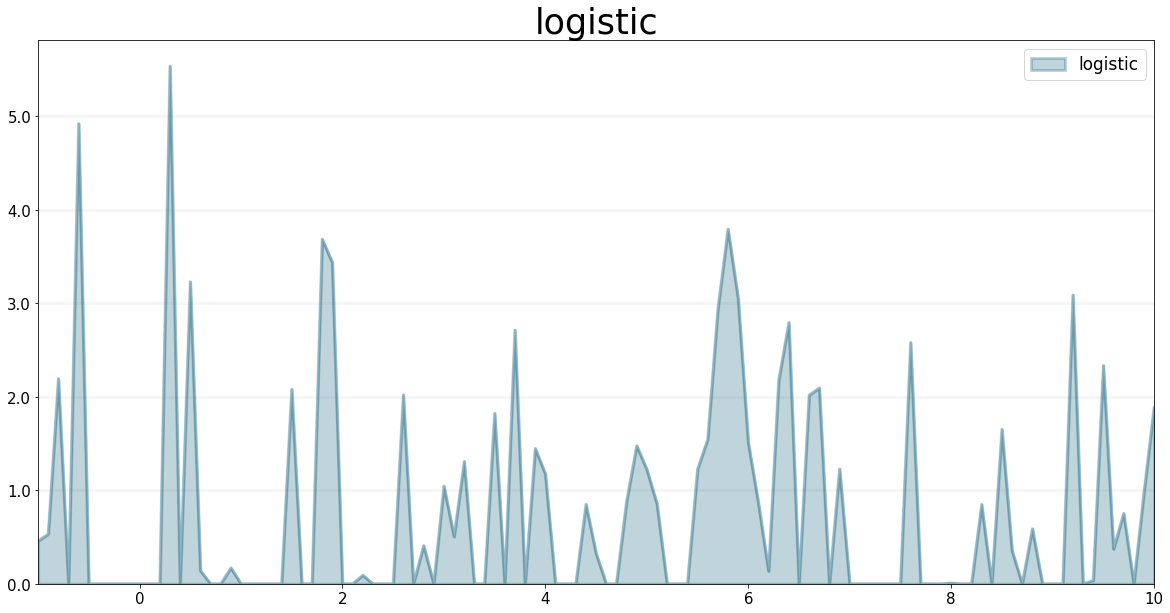

In [24]:
m= Model(starttime=-1,stoptime=10,dt=0.1)
f = m.flow(name="logistic")

mean = 0
scale = 1

f.equation = sd.logistic(mean, scale)
f.plot()

## LOGNORMAL Function
The LOGNORMAL operator generates a series of random numbers that conform to a Log-Normal distribution (that is, the log of the independent variable follows a normal distribution) with a specified mean and stddev (standard deviation). LOGNORMAL samples a new random number in each iteration of a simulation. 

Arguments are ``mean`` and ``standard deviation``

Example:

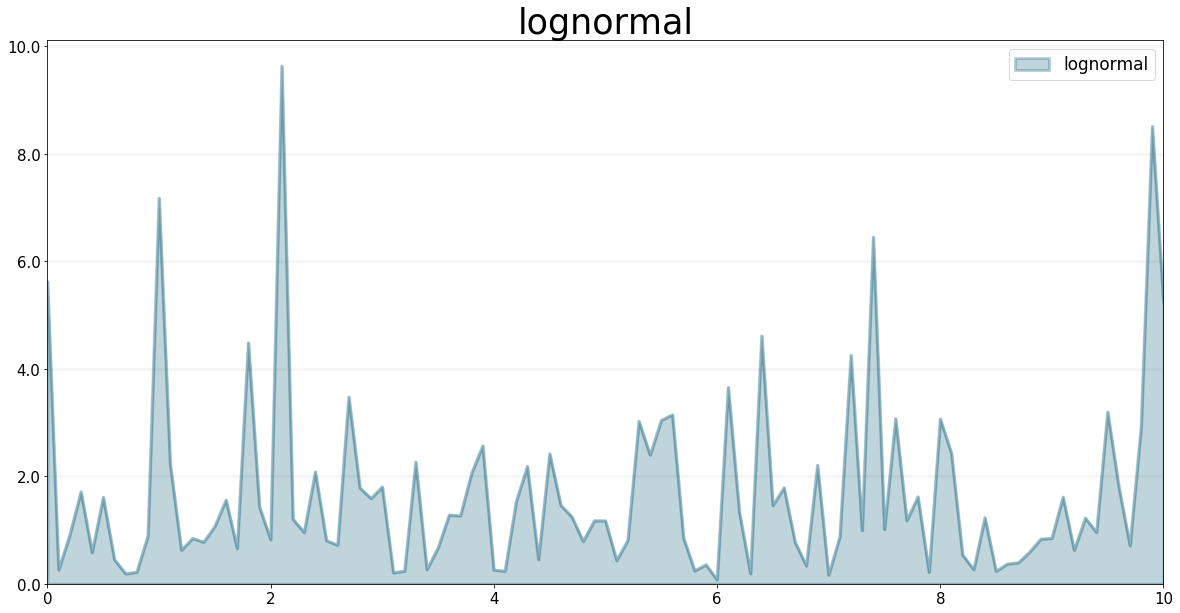

In [30]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="lognormal")

mean = 0
stdev = 1
f.equation = sd.lognormal(mean, stdev)
f.plot()

## MONTECARLO Function
The MONTECARLO operator randomly generates a series of zeros and ones from a Bernoulli distribution based on the probability you've provided. The probability is the percentage probability of an event happening per unit of simulation time. The probability value can be either a variable or a constant, but should evaluate to a number between 0 and 100.

MONTECARLO is equivalent to the following logic:

IF (RANDOM(0,100,<seed>) < probability*DT THEN 1 ELSE 0
    
Example:

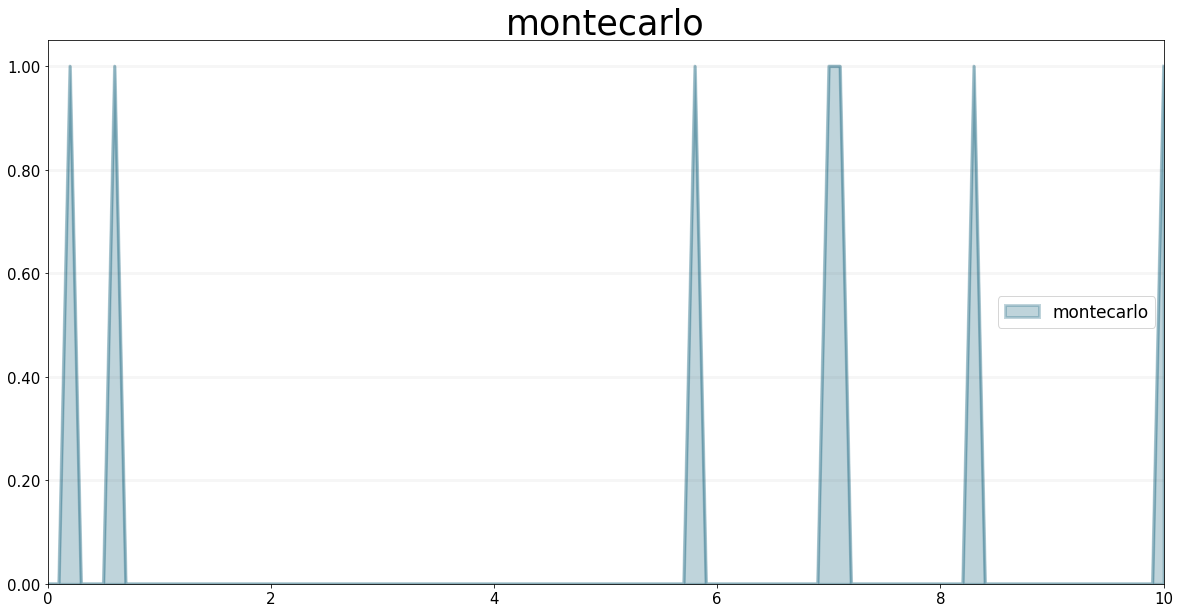

In [35]:
m= Model(starttime=0,stoptime=10,dt=0.1)
f = m.flow(name="montecarlo")

probability = 50
f.equation = sd.montecarlo(probability)
f.plot()

## NORMAL Function
The NORMAL operator generates a series of normally distributed random numbers with a specified mean and stddev (standard deviation).

Arguments are ``mean`` and the ``standard deviation`` of the underlying normal distribution.

Example:

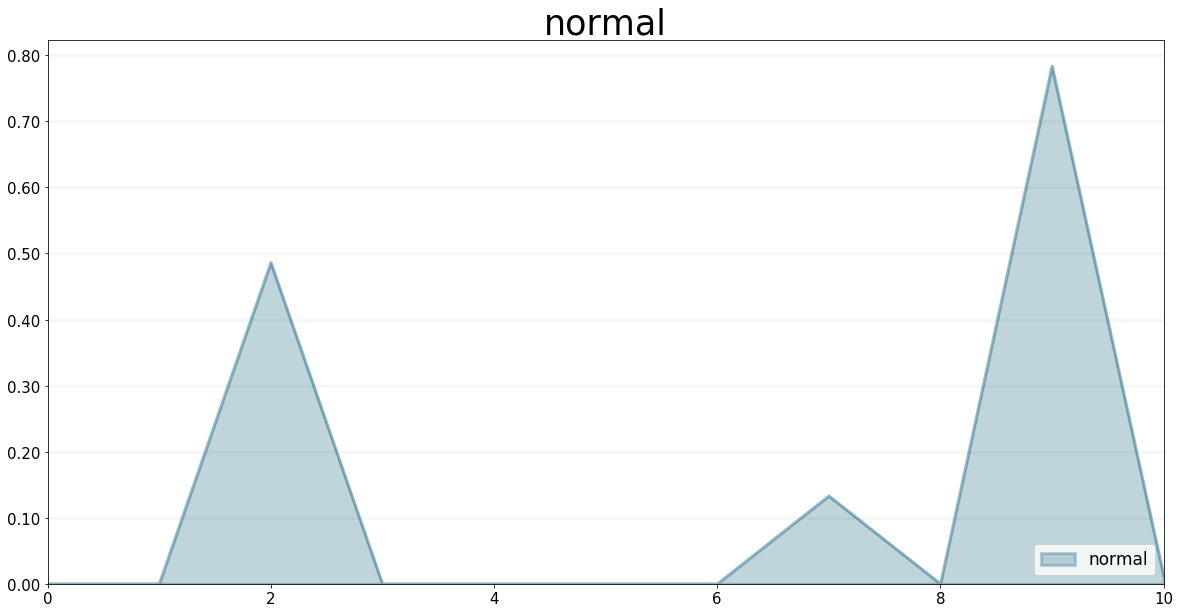

In [37]:
m= Model(starttime=0,stoptime=10,dt=1)
f = m.flow(name="normal")

mean = 0
stdev = 1
f.equation = sd.normal(mean, stdev)
f.plot()

## NORMALCDF Function
The NORMALCDF operator calculates the cumulative Normal distribution function between the specified z-scores, or, when the mean and stddev (standard deviation) are given, between two data values. 

Arguments are the ``left`` and ``right`` boundaries and optionally ``mean`` and ``stddev``. If not given, mean will be set to 0, stddev to 1.

A really simple example:

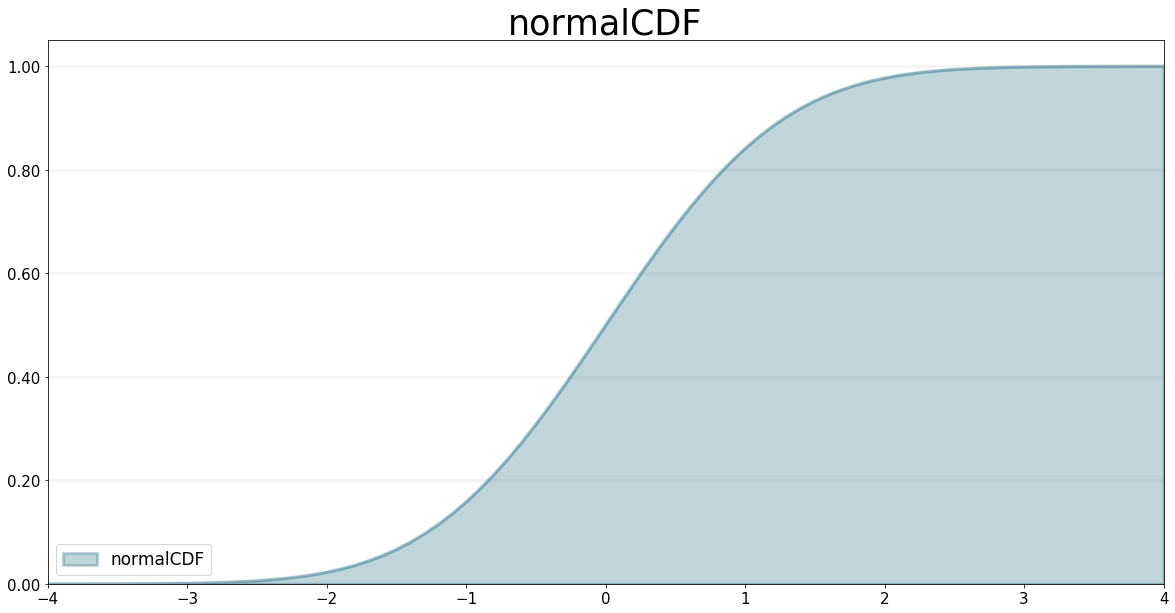

In [39]:
m= Model(starttime=-4,stoptime=4,dt=0.1)
f = m.flow(name="normalCDF")
left = -4
right = sd.time()
mean = 0
stddev = 1
f.equation = sd.normalcdf(left, right, mean, stddev)
f.plot()

## PARETO Function
The PARETO operator generates a series of random numbers that conforms to a distribution whose log is exponentially distributed with a specified shape and scale

Arguments are ``shape`` and ``scale``.

Example:

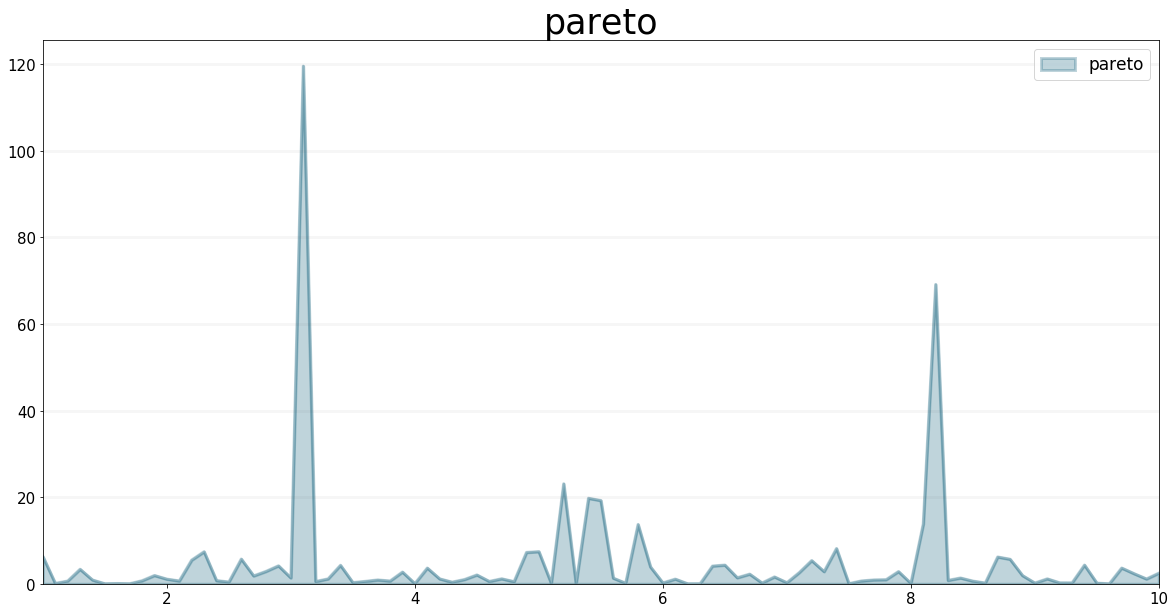

In [41]:
m= Model(starttime=1,stoptime=10,dt=0.1)
f = m.flow(name="pareto")
shape = 1
scale = 1

f.equation = sd.pareto(shape, scale)
f.plot()

## PERMUTATIONS
The PERMUTATIONS operator calculates the number of permutations of an n-element set with r-element subsets.

Arguments are ``n`` and ``r``. Note that both numbers should be integer values.

Example:

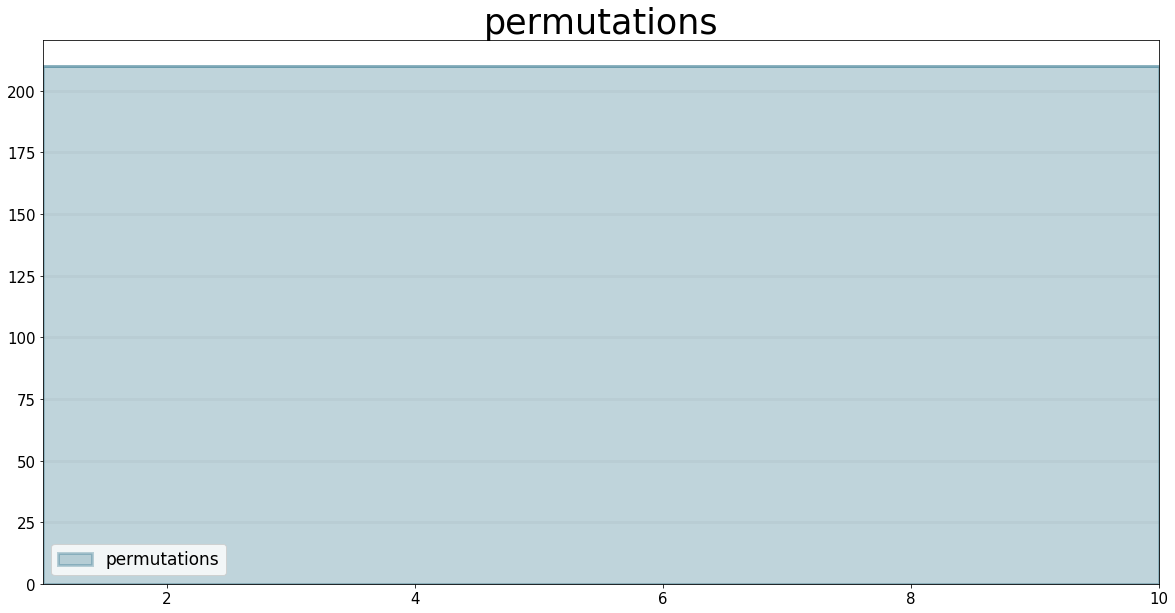

In [43]:
m= Model(starttime=1,stoptime=10,dt=0.1)
f = m.flow(name="permutations")
n = 7.0
r = 3

f.equation = sd.permutations(n, r)
f.plot()

## POISSON Function
The POISSON operator generates a series of random numbers that conform to a Poisson distribution. The mean value of the output is mu * DT.

Only argument is ``mu``, a float or integer number or any operator that returns a number.

Example (with an increasing ``mu`` expressed as the current simulation time):

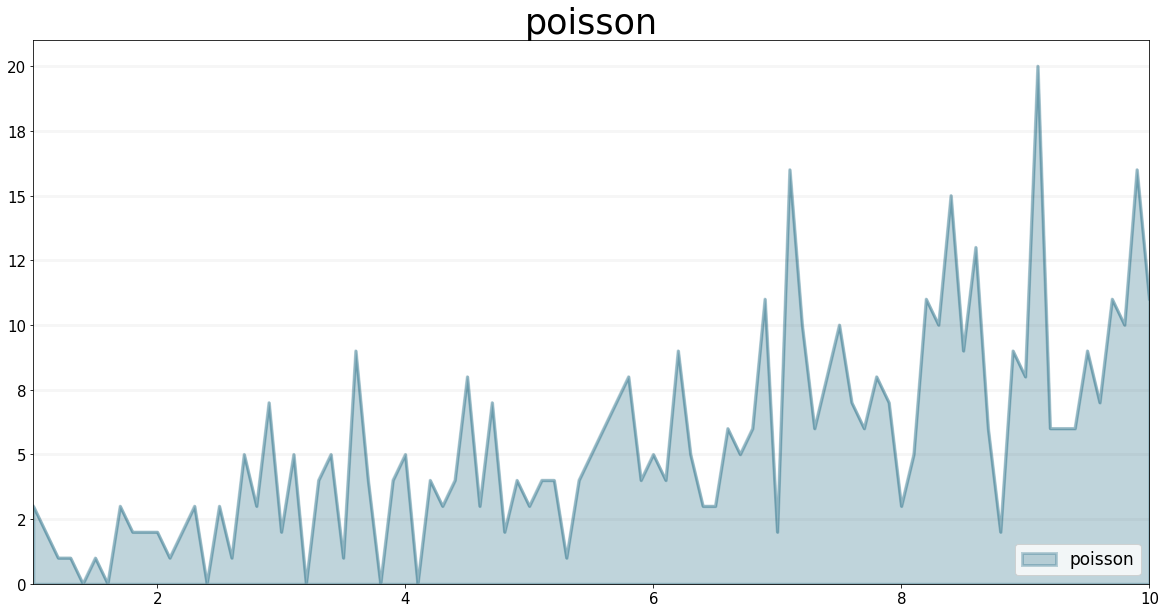

In [44]:
m= Model(starttime=1,stoptime=10,dt=0.1)
f = m.flow(name="poisson")
mu = sd.time()

f.equation = sd.poisson(mu)
f.plot()

## RANDOM / UNIFORM Function

RANDOM and UNIFORM both draw a random number between a minimum and maximum value that conforms to a uniform distribution. For compatibility to modelling practices, we included both into the SD DSL (just as the Stella Architect builtins).

Arguments are the ``min_value`` and ``max_value`` between which the random number should lie. If not given, the random number is between 0 and 1.

Simple example where the number always lies between DT and the current simulation time:

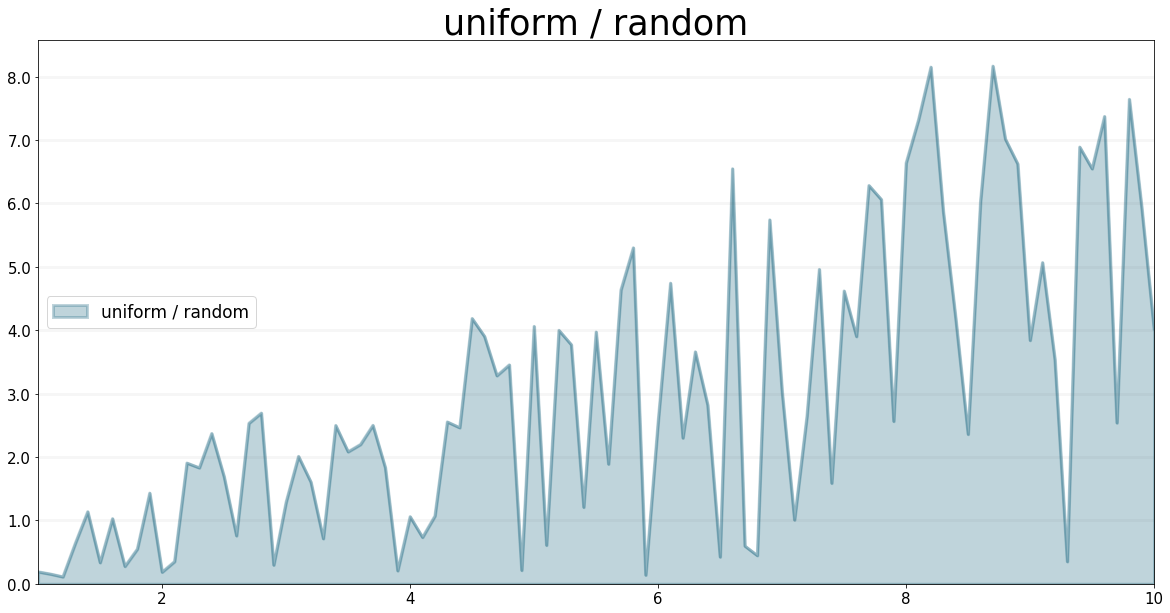

In [49]:
m= Model(starttime=1,stoptime=10,dt=0.1)
f = m.flow(name="uniform / random")
min_value = 0.1
max_value = sd.time()

f.equation = sd.random(min_value, max_value)
f.plot()

## TRIANGULAR Function
The TRIANGULAR operator generates a series of random numbers that conforms to a triangular distribution with a specified ``lower bound``, ``mode``, and ``upper bound``.

A simple example with the current simulation time as upper bound:

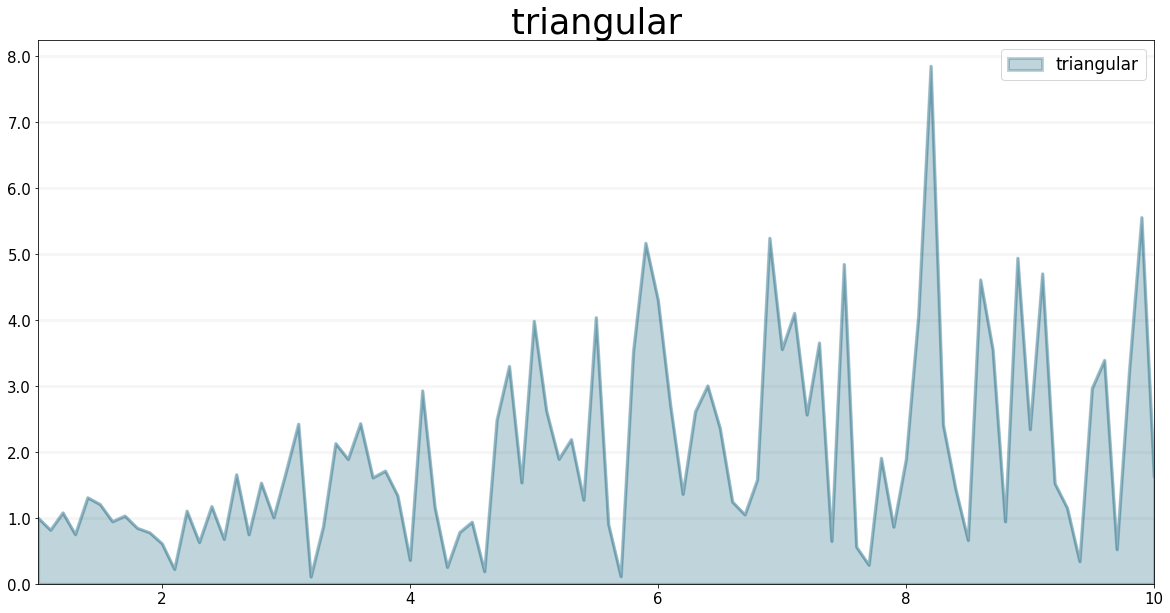

In [45]:
m= Model(starttime=1,stoptime=10,dt=0.1)
f = m.flow(name="triangular")
lower_bound = 0
mode = 1
upper_bound = sd.time()

f.equation = sd.triangular(lower_bound, mode, upper_bound)
f.plot()

## WEIBULL Function
The WEIBULL operator generates a series of random numbers that conforms to a Weibull distribution with the specified ``shape`` and ``scale``.

Let's create a quick example with ``scale`` set to the current simulation time:

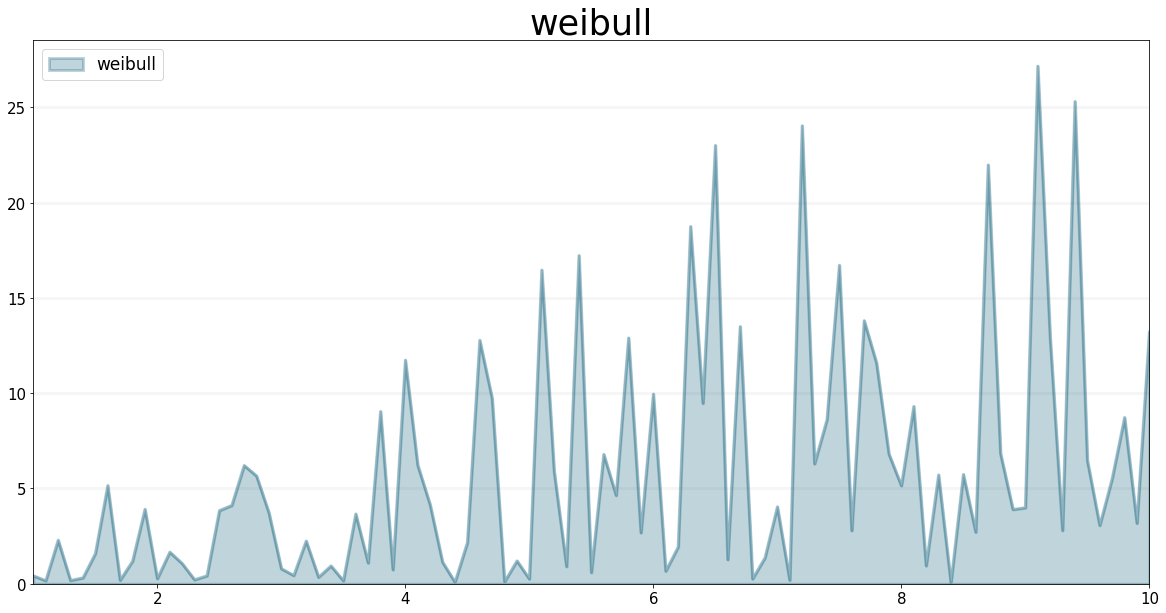

In [48]:
m= Model(starttime=1,stoptime=10,dt=0.1)
f = m.flow(name="weibull")
shape = 1
scale = sd.time()

f.equation = sd.weibull(shape, scale)
f.plot()